In [4]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
# import pylandau as pland
# import ROOT
import sys

from ROOT import TFile, TTree
from array import array


def Landau(x,a, MP,xi):
    C1 = a/np.sqrt((2 * np.pi))
    C2 = np.exp(-((x-MP)-1)/xi)
    C3 = np.exp((-0.5 * (((x-MP)-1)/xi + C2 )))
    return  C1 * C3

def Landgauss(x,a, MP, xi, b,eps):
    C1 = a/np.sqrt((2 * np.pi))
    C2 = np.exp(-((x-MP)-1)/xi)
    C3 = np.exp((-0.5 * (((x-MP)-1)/xi + C2 )))
    C4 = C1 * C3
    C5 = b * np.exp(-x/eps)
    return  C4 + C5

In [5]:
## Configuración del estilo de las imágenes
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

In [7]:
############# Otras direcciones anteriores a 2024 ############
# path = 'datahistogram_Imgs_1541_Sol_0.7_Elip_4.5.pkl'
# path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/data_muons_Imgs_1939_Sol_0.7_Elip_4.5_.pkl'
# path_All_Events = 'data_histogram_Imgs_500_Sol_0.7_Elip_2_All_Events.pkl'
# path_StraCirc_Events = 'data_histogram_Imgs_500_Sol_0.7_Elip_2.5Straight_and_Circular.pkl'
# path_Straight_events = 'data_histogram_Imgs_500_Sol_0.7_Elip_4.5Straight.pkl'

# -------------------------------------------------------------------- #
 
######### Paths actuales ###################

## Casa ##
# path='/home/bruce/Documents/Programas/Catalogo_Eventos/dict_muons_Extensions_1_to_4_Imgs_2078_Sol_0.7_Elip_3.5_electrons__.pkl'
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict_muons_Extensions_1_to_4_Imgs_5_Sol_0.7_Elip_3.5_electrons__.pkl'
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict_muons_Extensions_1_to_4_Imgs_2078_Sol_0.7_Elip_3.5_ADUs__.pkl'

######## Nueva definición de la elipcidad ############
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_to_4_Imgs_189_Sol_0.7_Elip_0.65_NSIGMAS_20_KeV.pkl'
path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_to_4_Imgs_189_Sol_0.7_Elip_0.65_NSIGMAS_25_550x400_KeV.pkl'

### === Path de espectro de energía de todos los clusters === ###
# path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_to_4_Imgs_189_Sol_0.7_Elip_0.65_KeV.pkl'
# # path_antes = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_KeV.pkl'

# # path = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_NSIGMAS_5_KeV.pkl'
# # path = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_393_SIZE_400x700__NSIGMAS_5_KeV.pkl'
# path = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_393_SIZE_300x529__NSIGMAS_5_KeV.pkl'
# # path = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_393_SIZE_250x529__NSIGMAS_5_KeV.pkl'


histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

In [8]:
#### Visualizar las keys del diccionario ####
list_path = path.split('_')
print('Las unidades de los datos están en: ', data_histogram['Energy_Units'])
print('Llaves principales del diccionario: ', data_histogram.keys())
print('Llaves secuandarias por extensión: ', data_histogram['extension_1'].keys())
# print(type(data_histogram['extension_1']['all_events']))

Las unidades de los datos están en:  2
Llaves principales del diccionario:  dict_keys(['Num_Images', 'All_Muons_Detected', 'Energy_Units', 'Elipticity', 'Solidity', 'extension_1', 'extension_2', 'extension_4'])
Llaves secuandarias por extensión:  dict_keys(['charge', 'deltaEL', 'deltaL', 'all_events', 'theta', 'phi', 'gain'])


In [9]:
# print('Elipcidad por extensión: ', data_histogram['Elipticity'])
print('Solidity por exensión: ', data_histogram['Solidity'])

Solidity por exensión:  [0.7, 0.7, 0, 0.7]


In [10]:
data_muons_extension_1 = data_histogram['extension_1']
data_muons_extension_2 = data_histogram['extension_2']
data_muons_extension_4 = data_histogram['extension_4']

data_muons_extension_1.keys()

dict_keys(['charge', 'deltaEL', 'deltaL', 'all_events', 'theta', 'phi', 'gain'])

In [11]:
n_muons = data_histogram['All_Muons_Detected']
print('Se detectaron ', n_muons, ' muones (contando las 3 extensiones)')

Se detectaron  7387  muones (contando las 3 extensiones)


In [12]:
print(data_muons_extension_4['gain'])

[186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 186.12160323770715, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 187.25697512000178, 188.3675336745206, 188.3675336745206, 188.3675336745206, 188.3675336745206, 188.3675336745206, 188.3675336745206, 188.3675336745206, 188.3675336745206, 188.3675336745206, 188.3675336745206, 188.3675336745206, 188.3675336745206, 188.3675336

## Espectro de Energía

### Todos los clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


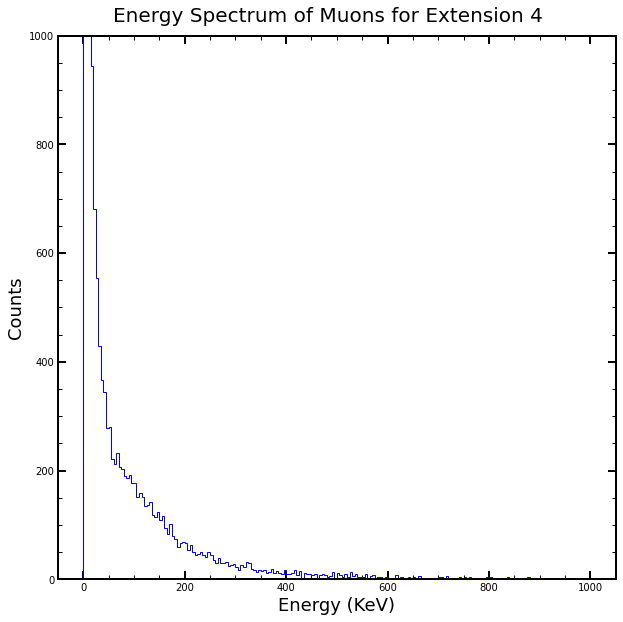

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


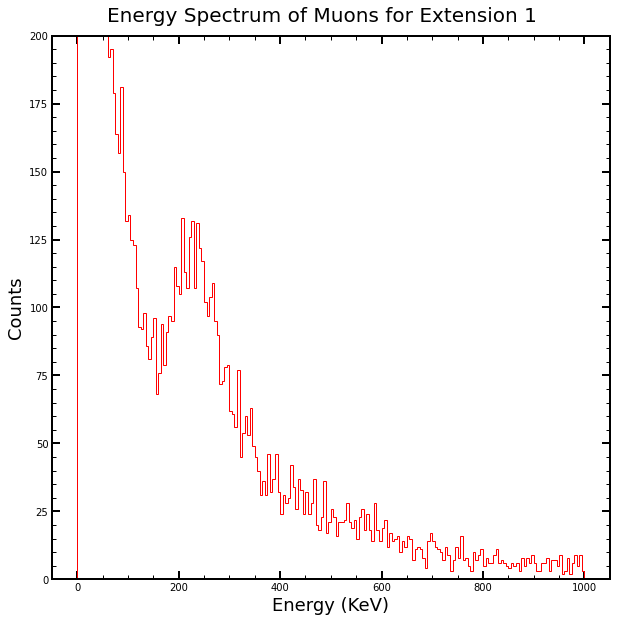

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


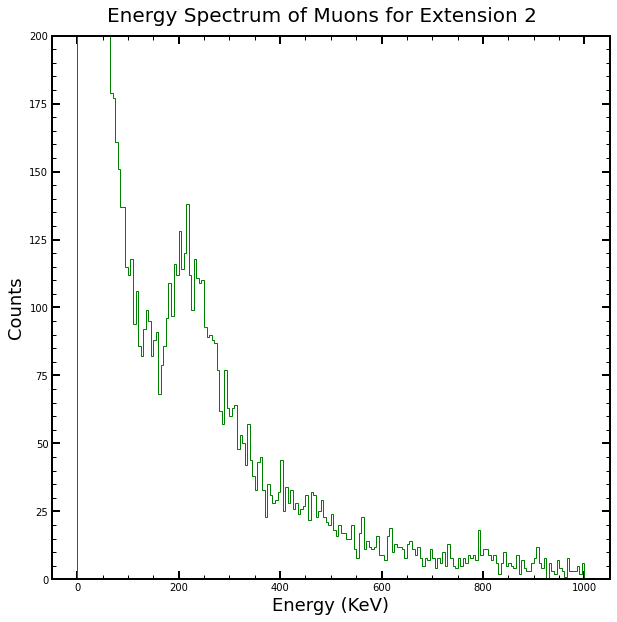

In [8]:
# print(np.max(data_muons_extension_4['charge']))

############################################ ----- EXTENSION 4 ----- ###################################
BINS = 200
plot_range = (0, 1000)

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(data_muons_extension_4['charge'] , bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'b', histtype = 'step')
axs.legend()

## EScala Normal
axs.set_ylim(0,1000)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 4', size = 20, y=0.92)
plt.show()

############################################ ----- EXTENSION 1 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = 500, range= (np.min(data_muons_extension_2['all_events']),0.4 * 10**6), 
#             color = 'g', label= 'Extension 2')

axs.hist(data_muons_extension_1['charge'] , bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'r',  histtype = 'step')

axs.legend()

## EScala Normal
axs.set_ylim(0,200)
# axs.set_xlim(0,190000)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 1', size = 20, y=0.92)
plt.show()

############################################ ----- EXTENSION 2 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(data_muons_extension_2['charge'] , bins = BINS, range= (plot_range[0], plot_range[1]), 
            color = 'g',  histtype = 'step')

axs.legend()

## EScala Normal
axs.set_ylim(0,200)
# axs.set_xlim(0,190000)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 2', size = 20, y=0.92)
plt.show()

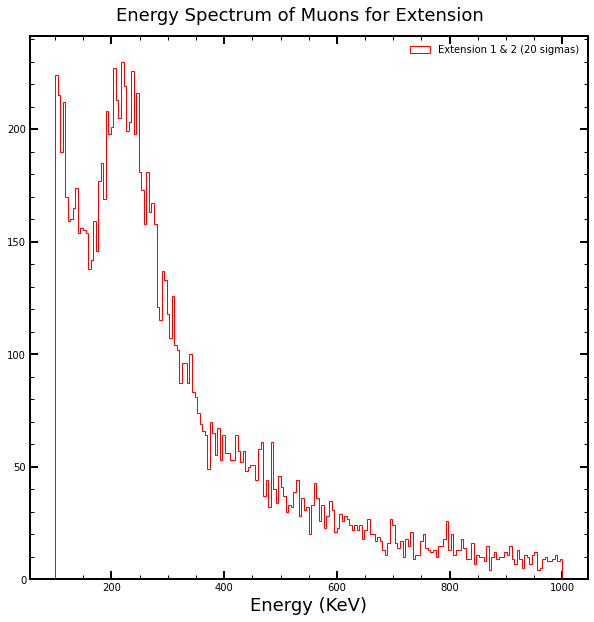

In [9]:
data_ext_1_2 = data_muons_extension_1['charge'] + data_muons_extension_2['charge']

Bins = 200
max_energy = 1000
min_energy = 100
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_1['charge'], bins = Bins, range= (0, max_energy), 
#             color = 'r', label= 'Extension 1',  histtype = 'step')

# axs.hist(data_muons_extension_2['charge'], bins = Bins, range= (0,max_energy),
# 
#             color = 'g', label= 'Extension 2',  histtype = 'step')

# axs.hist(data_muons_extension_4['charge'], bins = Bins, range= (0,max_energy), 
#             color = 'b', label= 'Extension 4',  histtype = 'step')

# axs.hist(data_ext_1_2, bins = Bins, range = [0, max_energy], color = 'k', label= 'Extension 1 & 2 (20 sigmas)',  histtype = 'step')

axs.hist(data_ext_1_2, bins = Bins, range = [min_energy, max_energy], color = 'r', label= 'Extension 1 & 2 (20 sigmas)',  histtype = 'step')

axs.legend()
# axs.set_yscale('log')
# axs.set_ylim(50, 700)
axs.set_xlabel('Energy (KeV)', size = 18,loc='center')
# axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum of Muons for Extension', size = 18, y=0.92)
plt.show()

In [10]:
hist, bins_edges = np.histogram(data_ext_1_2, bins=150, range = (200, max_energy))

print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

El pico está en:  216.0  KeV


In [ ]:
# N_Muons = array('f', [-9999])
# Thet_Rad = array('f', [-9999])
# Phi_Rad = array('f', [-9999])
# Energy_array = array('f', [-9999])
DeltaL_array = array('f', [-9999])
Energy_Landau_array = array('f', [-9999])

location_file = '../Simulacion_ab_initio/'
file_root_name = 'Edep_NSAMP324_300x529_EXPOSURE_4504_MeV.root'
# file_root_name = 'Edep_NSAMP324_250x529_EXPOSURE_4504_MeV.root'
# file_root_name = 'Edep_NSAMP324_250x529_EXPOSURE_4504_MeV_0.root'
file = TFile.Open(location_file  + file_root_name, "RECREATE")
tree = TTree('tree', 'tree')

# tree.Branch('nmuon',N_Muons, 'nmuon/F' )
# tree.Branch('thet', Thet_Rad, 'thet/F')
# tree.Branch('phi', Phi_Rad, 'phi/F')
# tree.Branch('epri', Energy_array, 'epri/F')

tree.Branch('l', DeltaL_array, 'l/F')
tree.Branch('edep', Energy_Landau_array, 'edep/F')

# for i in np.arange(0, len(data_muons_extension_2['charge'])):
#     # N_Muons[0] = list_nmuons[i]
#     # N_Muons[0] = dict_muons['NMuon'][i]
#     # Thet_Rad[0] = dict_muons['Theta(Rad)'][i]
#     # print(Thet_Deg[0])
#     #print(f'Ei={i} Energy_Landau={dict_muons_in_CCD}') 
#     # Phi_Rad[0] = dict_muons['Phi(Rad)'][i]
#     # Energy_array[0] =  dict_muons['Energy-SD(MeV)'][i] 
#     # DeltaL_array[0] = -1
#     Energy_Landau_array[0] = data_muons_extension_2['charge'][i] / 1000
#     # print(Energy_Landau_array[0])
#     # th_deg = dict_muons['Theta(Deg)'][0]
#     tree.Fill()

for i in np.arange(0, len(data_ext_1_2)):
    Energy_Landau_array[0] = data_ext_1_2[i] / 1000
    
    tree.Fill()

tree.Write()
file.Close()

### Variando Nsigmas

In [47]:
path = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_NSIGMAS_20_KeV.pkl'
path_5sig = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_NSIGMAS_5_KeV.pkl'
path_10sig = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_NSIGMAS_10_KeV.pkl'
path_15sig = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_NSIGMAS_15_KeV.pkl'
path_20sig = './Diccionarios_Espetro_Muones/dict_energy_allclusters_NSAMP324_Extensions_1_to_4_Imgs_189_NSIGMAS_20_KeV.pkl'



histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

histogram_5 = open(path_5sig, 'rb')
data_histogram_5= pck.load(histogram_5)
histogram_5.close()

histogram_10 = open(path_10sig, 'rb')
data_histogram_10= pck.load(histogram_10)
histogram_10.close()

histogram_15 = open(path_15sig, 'rb')
data_histogram_15= pck.load(histogram_15)
histogram_15.close()

histogram_20 = open(path_20sig, 'rb')
data_histogram_20= pck.load(histogram_20)
histogram_20.close()


Clusters detectados (5 sigmas):  3946662
Clusters detectados (10 sigmas):  2265944
Clusters detectados (15 sigmas):  1292852
Clusters detectados (20 sigmas):  685120


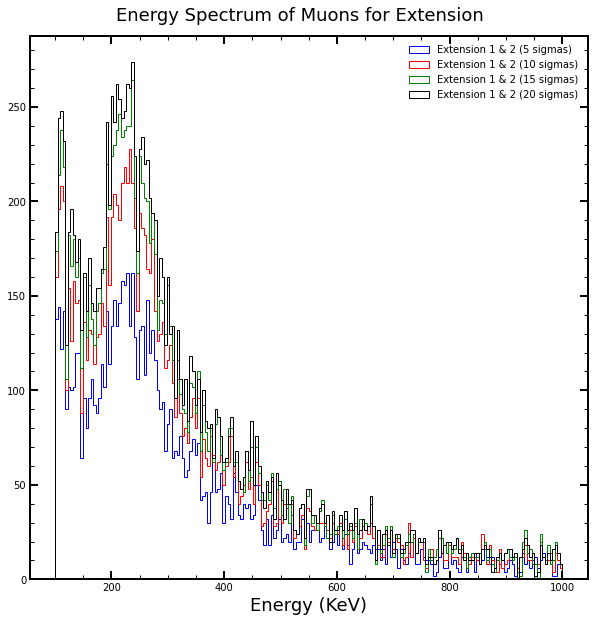

In [49]:
data_ext_1_2 = data_muons_extension_1['charge'] + data_muons_extension_2['charge']

data_all_extension_1_sig5 = data_histogram_5['extension_1']
data_all_extension_2_sig5 = data_histogram_5['extension_2']

data_all_extension_1_sig10 = data_histogram_10['extension_1']
data_all_extension_2_sig10 = data_histogram_10['extension_2']

data_all_extension_1_sig15 = data_histogram_15['extension_1']
data_all_extension_2_sig15 = data_histogram_15['extension_2']

data_all_extension_1_sig20 = data_histogram_20['extension_1']
data_all_extension_2_sig20 = data_histogram_20['extension_2']

n_clusters_5sig = data_histogram_5['All_Muons_Detected']
n_clusters_10sig = data_histogram_10['All_Muons_Detected']
n_clusters_15sig = data_histogram_15['All_Muons_Detected']
n_clusters_20sig = data_histogram_20['All_Muons_Detected']

print('Clusters detectados (5 sigmas): ', n_clusters_5sig)
print('Clusters detectados (10 sigmas): ', n_clusters_10sig)
print('Clusters detectados (15 sigmas): ', n_clusters_15sig)
print('Clusters detectados (20 sigmas): ', n_clusters_20sig)


data_ext_1_2_sig5 = data_all_extension_1_sig5['charge'] + data_all_extension_1_sig5['charge']
data_ext_1_2_sig10 = data_all_extension_1_sig10['charge'] + data_all_extension_1_sig10['charge']
data_ext_1_2_sig15 = data_all_extension_1_sig15['charge'] + data_all_extension_1_sig15['charge']
data_ext_1_2_sig20 = data_all_extension_1_sig20['charge'] + data_all_extension_1_sig20['charge']


Bins = 200
max_energy = 1000
min_energy = 100
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_1['charge'], bins = Bins, range= (0, max_energy), 
#             color = 'r', label= 'Extension 1',  histtype = 'step')

# axs.hist(data_muons_extension_2['charge'], bins = Bins, range= (0,max_energy),
# 
#             color = 'g', label= 'Extension 2',  histtype = 'step')

# axs.hist(data_muons_extension_4['charge'], bins = Bins, range= (0,max_energy), 
#             color = 'b', label= 'Extension 4',  histtype = 'step')
axs.hist(data_ext_1_2_sig5, bins = Bins, range = [min_energy, max_energy], color = 'b', label= 'Extension 1 & 2 (5 sigmas)',  histtype = 'step')
axs.hist(data_ext_1_2_sig10, bins = Bins, range = [min_energy, max_energy], color = 'r', label= 'Extension 1 & 2 (10 sigmas)',  histtype = 'step')
axs.hist(data_ext_1_2_sig15, bins = Bins, range = [min_energy, max_energy], color = 'g', label= 'Extension 1 & 2 (15 sigmas)',  histtype = 'step')
axs.hist(data_ext_1_2_sig20, bins = Bins, range = [min_energy, max_energy], color = 'k', label= 'Extension 1 & 2 (20 sigmas)',  histtype = 'step')

# axs.hist(data_ext_1_2, bins = Bins, range = [0, max_energy], color = 'k', label= 'Extension 1 & 2 (20 sigmas)',  histtype = 'step')

# axs.hist(data_ext_1_2, bins = Bins, range = [min_energy, max_energy], color = 'r', label= 'Extension 1 & 2 (20 sigmas)',  histtype = 'step')

axs.legend()
# axs.set_yscale('log')
# axs.set_ylim(50, 700)
axs.set_xlabel('Energy (KeV)', size = 18,loc='center')
# axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum of Muons for Extension', size = 18, y=0.92)
plt.show()

In [50]:
hist, bins_edges = np.histogram(data_ext_1_2_sig5, bins=200, range = (min_energy, max_energy))
print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

hist, bins_edges = np.histogram(data_ext_1_2_sig10, bins=200, range = (min_energy, max_energy))
print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

hist, bins_edges = np.histogram(data_ext_1_2_sig15, bins=200, range = (min_energy, max_energy))
print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

hist, bins_edges = np.histogram(data_ext_1_2_sig20, bins=200, range = (min_energy, max_energy))
print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

El pico está en:  226.0  KeV
El pico está en:  230.5  KeV
El pico está en:  235.0  KeV
El pico está en:  235.0  KeV


### NSAMP324

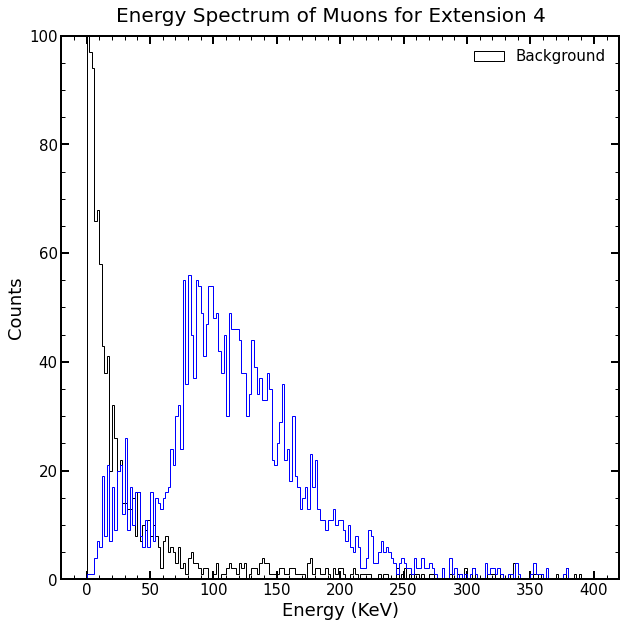

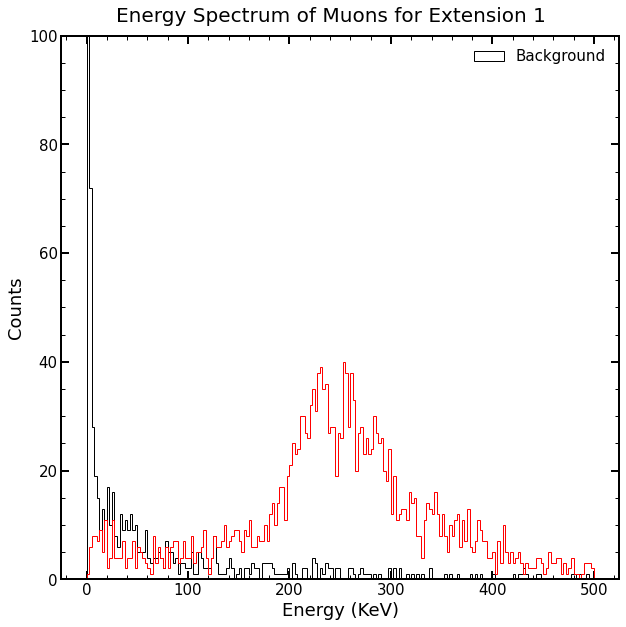

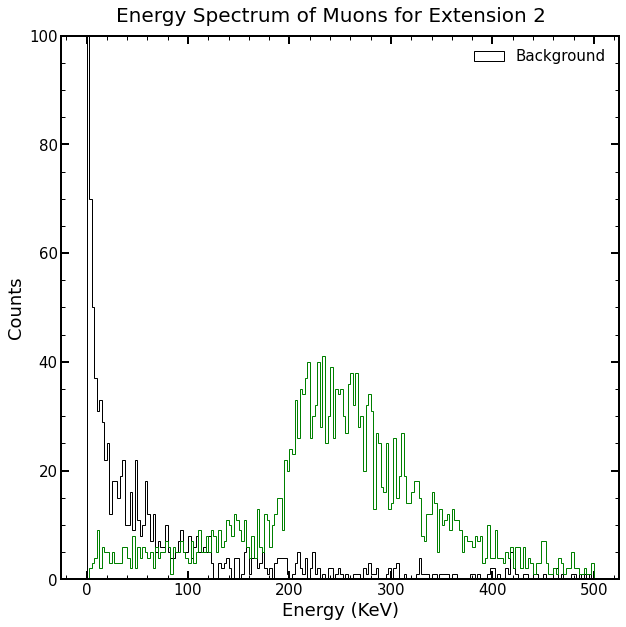

In [13]:
# print(np.max(data_muons_extension_4['charge']))

############################################ ----- EXTENSION 4 ----- ###################################
BINS = 200

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(data_muons_extension_4['all_events'], bins = BINS, range= (0, 400), 
            color = 'k', histtype = 'step', label = 'Background')
axs.hist(data_muons_extension_4['charge'] , bins = BINS, range= (0, 400), 
            color = 'b', histtype = 'step')

axs.legend()

## EScala Normal
axs.set_ylim(0,100)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 4', size = 20, y=0.92)
plt.show()

############################################ ----- EXTENSION 1 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = 500, range= (np.min(data_muons_extension_2['all_events']),0.4 * 10**6), 
#             color = 'g', label= 'Extension 2')

axs.hist(data_muons_extension_1['all_events'] , bins = BINS, range= (0, 500), 
            color = 'k', histtype = 'step', label = 'Background')
axs.hist(data_muons_extension_1['charge'] , bins = BINS, range= (0, 500), 
            color = 'r',  histtype = 'step')

axs.legend()

## EScala Normal
axs.set_ylim(0,100)
# axs.set_xlim(0,190000)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 1', size = 20, y=0.92)
plt.show()

############################################ ----- EXTENSION 2 ----- ###################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(data_muons_extension_2['all_events'], bins = BINS,range= (0, 500), 
            color = 'k', histtype = 'step', label = 'Background')
axs.hist(data_muons_extension_2['charge'] , bins = BINS, range= (0, 500), 
            color = 'g',  histtype = 'step')

axs.legend()

## EScala Normal
axs.set_ylim(0,100)
# axs.set_xlim(0,190000)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (KeV)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 2', size = 20, y=0.92)
plt.show()

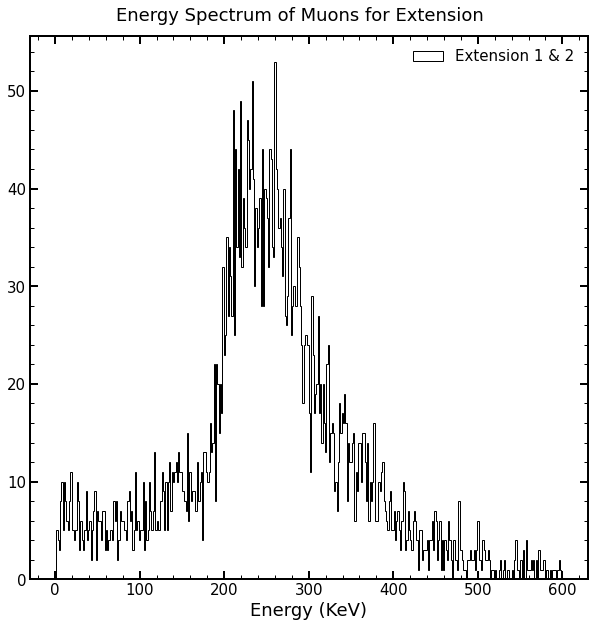

In [14]:
data_ext_1_2 = data_muons_extension_1['charge'] + data_muons_extension_2['charge']


Bins = 400
max_energy = 600
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_1['charge'], bins = Bins, range= (0, max_energy), 
#             color = 'r', label= 'Extension 1',  histtype = 'step')

# axs.hist(data_muons_extension_2['charge'], bins = Bins, range= (0,max_energy), 
#             color = 'g', label= 'Extension 2',  histtype = 'step')

# axs.hist(data_muons_extension_4['charge'], bins = Bins, range= (0,max_energy), 
#             color = 'b', label= 'Extension 4',  histtype = 'step')

axs.hist(data_ext_1_2, bins = Bins, range = [0, max_energy], color = 'k', label= 'Extension 1 & 2',  histtype = 'step')

axs.legend()

# axs.set_xlim(0, 500)
axs.set_xlabel('Energy (KeV)', size = 18,loc='center')
# axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum of Muons for Extension', size = 18, y=0.92)
plt.show()

In [15]:
hist, bins_edges = np.histogram(data_ext_1_2, bins=Bins, range = (0, max_energy))

print('El pico está en: ', bins_edges[np.argmax(hist)], ' KeV')

El pico está en:  259.5  KeV


In [25]:
from ROOT import TFile, TTree
from array import array

# N_Muons = array('f', [-9999])
# Thet_Rad = array('f', [-9999])
# Phi_Rad = array('f', [-9999])
# Energy_array = array('f', [-9999])
DeltaL_array = array('f', [-9999])
Energy_Landau_array = array('f', [-9999])

location_file = '/home/bruce/Documents/Programas/Simulacion_ab_initio/'
file_root_name = 'Edep_NSAMP324_MeV.root'
file = TFile.Open(location_file  + file_root_name, "RECREATE")
tree = TTree('tree', 'tree')

# tree.Branch('nmuon',N_Muons, 'nmuon/F' )
# tree.Branch('thet', Thet_Rad, 'thet/F')
# tree.Branch('phi', Phi_Rad, 'phi/F')
# tree.Branch('epri', Energy_array, 'epri/F')

tree.Branch('l', DeltaL_array, 'l/F')
tree.Branch('edep', Energy_Landau_array, 'edep/F')

for i in np.arange(0, len(data_ext_1_2)):
    # N_Muons[0] = list_nmuons[i]
    # N_Muons[0] = dict_muons['NMuon'][i]
    # Thet_Rad[0] = dict_muons['Theta(Rad)'][i]
    # print(Thet_Deg[0])
    #print(f'Ei={i} Energy_Landau={dict_muons_in_CCD}') 
    # Phi_Rad[0] = dict_muons['Phi(Rad)'][i]
    # Energy_array[0] =  dict_muons['Energy-SD(MeV)'][i] 
    # DeltaL_array[0] = -1
    Energy_Landau_array[0] = data_ext_1_2[i] / 1000
    # print(Energy_Landau_array[0])
    # th_deg = dict_muons['Theta(Deg)'][0]
    tree.Fill()

tree.Write()
file.Close()

### NSAMP0

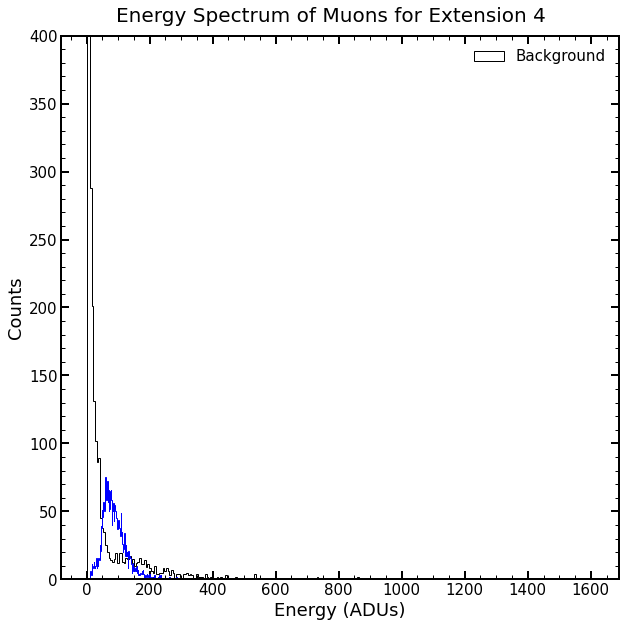

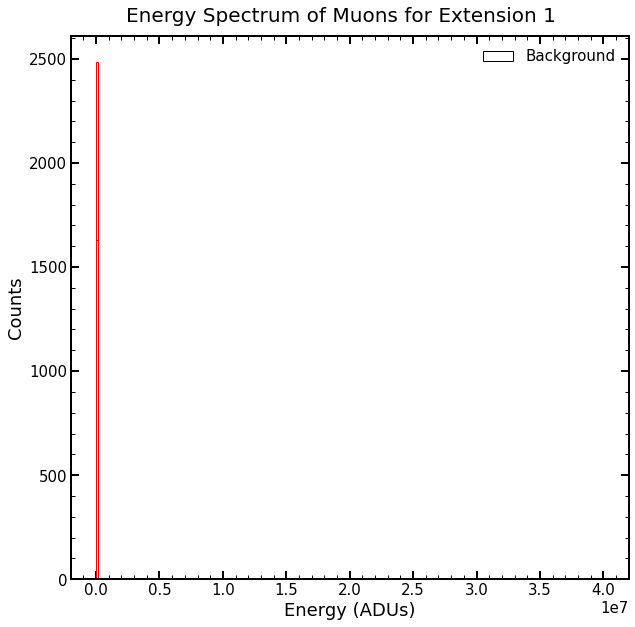

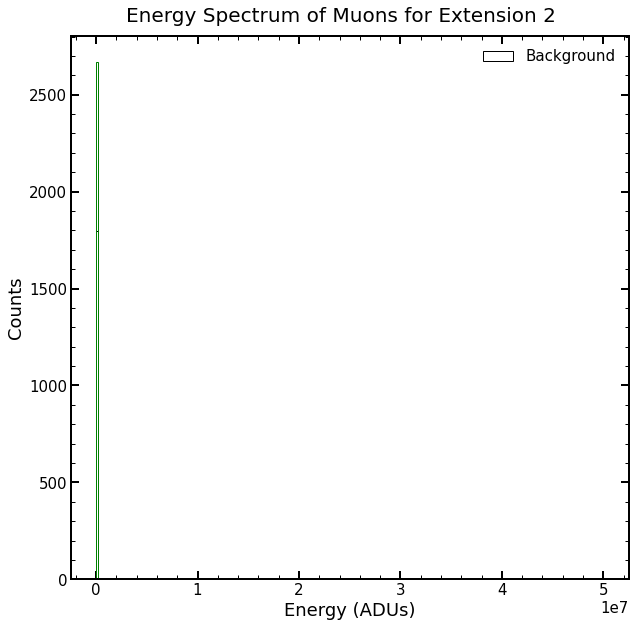

In [ ]:
# print(np.max(data_muons_extension_4['charge']))

############################################
BINS = 300

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(data_muons_extension_4['all_events'], bins = BINS, range= (0,1.6 * 10**7), 
            color = 'k', histtype = 'step', label = 'Background')
axs.hist(data_muons_extension_4['charge'] , bins = BINS, range= (0,1.6 * 10**7), 
            color = 'b', histtype = 'step')

axs.legend()

## EScala Normal
axs.set_ylim(0,400)
axs.set_xlim(0,0.175 * 10**8)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (ADUs)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 4', size = 20, y=0.92)
plt.show()

#############################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

# axs.hist(data_muons_extension_2['all_events'], bins = 500, range= (np.min(data_muons_extension_2['all_events']),0.4 * 10**6), 
#             color = 'g', label= 'Extension 2')

axs.hist(data_muons_extension_1['all_events'] , bins = BINS, range= ((np.min(data_muons_extension_1['charge']), 4 * 10**7)), 
            color = 'k', histtype = 'step', label = 'Background')
axs.hist(data_muons_extension_1['charge'] , bins = BINS, range= (np.min(data_muons_extension_1['charge']), 4 * 10**7), 
            color = 'r',  histtype = 'step')

axs.legend()

## EScala Normal
# axs.set_ylim(0,800)
# axs.set_xlim(0,190000)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (ADUs)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 1', size = 20, y=0.92)
plt.show()

############################################

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')

axs.hist(data_muons_extension_2['all_events'], bins = BINS,range= (np.min(data_muons_extension_2['charge']), 5 * 10**7), 
            color = 'k', histtype = 'step', label = 'Background')
axs.hist(data_muons_extension_2['charge'] , bins = BINS, range= (np.min(data_muons_extension_2['charge']), 5 * 10**7), 
            color = 'g',  histtype = 'step')

axs.legend()

## EScala Normal
# axs.set_ylim(0,800)
# axs.set_xlim(0,190000)

## Escala Log
# axs.set_yscale('log')


axs.set_xlabel('Energy (ADUs)', size = 18, loc='center')
axs.set_ylabel('Counts', size = 18, loc='center')
fig.suptitle(r'Energy Spectrum of Muons for Extension 2', size = 20, y=0.92)
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

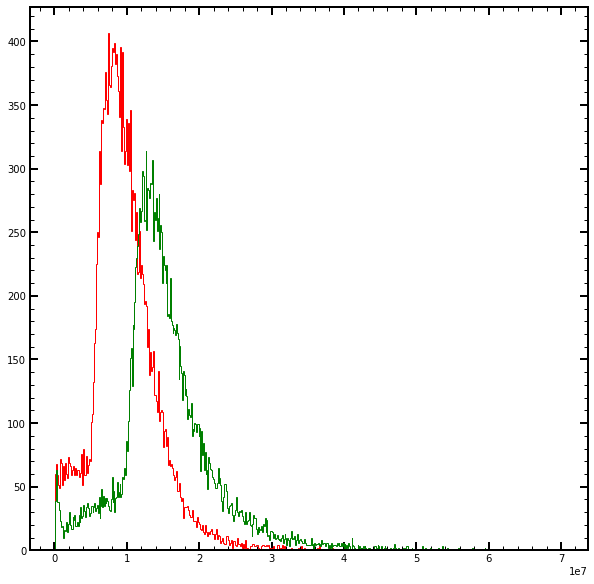

In [9]:
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')
axs.hist(data_muons_extension_1['charge'], bins = 500, range= (np.min(data_muons_extension_1['charge']), np.max(data_muons_extension_1['charge'])/3), 
            color = 'r', label= 'Extension 1',  histtype = 'step')

axs.hist(data_muons_extension_2['charge'], bins = 500, range= (np.min(data_muons_extension_2['charge']), np.max(data_muons_extension_2['charge'])/20), 
            color = 'g', label= 'Extension 2',  histtype = 'step')

axs.hist(data_muons_extension_4['charge'], bins = 500, range= (np.min(data_muons_extension_4['charge']), np.max(data_muons_extension_4['charge'])/2), 
            color = 'b', label= 'Extension 4',  histtype = 'step')

axs.legend()

axs.set_xlim(0, 4 * 10**7)
axs.set_xlabel('Energy (ADUs)', size = 18,loc='center')
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum of Muons for Extension', size = 18, y=0.92)
plt.show()

#### Calibracion en KeV

In [ ]:
BINS = 300

hist_1, bins_edges_1 = np.histogram(data_muons_extension_1['charge'], bins=BINS)
hist_2, bins_edges_2 = np.histogram(data_muons_extension_2['charge'], bins=BINS)
hist_4, bins_edges_4 = np.histogram(data_muons_extension_4['charge'], bins=BINS)

# print(bins_edges_1[np.argmax(hist_1)])
print('Pico de Extensión 1: ', bins_edges_1[np.argmax(hist_1)], 'ADUs')
print('Pico de Extensión 2: ', bins_edges_2[np.argmax(hist_2)], 'ADUs')
print('Pico de Extensión 4: ', bins_edges_4[np.argmax(hist_4)], 'ADUs', end='\n\n')

# print(bins_edges_2[np.argmax(hist_2)])

DEltaP = 152.545 #KeV para muones con momento de 600 MeV
print('El valor del pico de Landau para muones con momento de 600 MeV es: ', DEltaP, 'KeV', end='\n\n')
cal_1 =  bins_edges_1[np.argmax(hist_1)] / DEltaP ## ADUs/KeV
cal_2 =  bins_edges_2[np.argmax(hist_2)] / DEltaP ## ADUs/KeV
cal_4 =  bins_edges_4[np.argmax(hist_4)] / DEltaP ## ADUs/KeV

print('La calibración para cada extensión es: ')
print(cal_1, 'ADUs/KeV')
print(cal_2, 'ADus/KeV')
print(cal_4, 'ADUs/KeV')

Pico de Extensión 1:  7748516.0 ADUs
Pico de Extensión 2:  12059729.0 ADUs
Pico de Extensión 4:  6139996.5 ADUs

El valor del pico de Landau para muones con momento de 600 MeV es:  152.545 KeV

La calibración para cada extensión es: 
50794.95230915468 ADUs/KeV
79056.86190960045 ADus/KeV
40250.39496542004 ADUs/KeV


In [20]:
## Relacion entre ADUs y electrones 

rel_KeV_elec = 0.0037 #KeV

cal_KeV_e_1 = cal_1 * rel_KeV_elec
cal_KeV_e_2 = cal_2 * rel_KeV_elec
cal_KeV_e_4 = cal_4 * rel_KeV_elec

print('La calibración para cada extensión es: ')
print(cal_KeV_e_1, 'ADUs/e-')
print(cal_KeV_e_2, 'ADus/e-')
print(cal_KeV_e_4, 'ADUs/e-', end='\n\n')

expgain = [227, 220.4, 94.72, 197.7]

print('La calibración para las impagenes de 324')
print(expgain[0], 'ADUs/e-')
print(expgain[1], 'ADus/e-')
print(expgain[3], 'ADUs/e-')

La calibración para cada extensión es: 
187.94132354387233 ADUs/e-
292.5103890655217 ADus/e-
148.92646137205415 ADUs/e-

La calibración para las impagenes de 324
227 ADUs/e-
220.4 ADus/e-
197.7 ADUs/e-


In [39]:
## Cada dato se calibra con el valor del pico
data_1_cal = []
data_2_cal = []
data_4_cal = []
for index in np.arange(0, len(data_muons_extension_2['charge'])):
    data_1 = data_muons_extension_1['charge'][index] /cal_1
    data_2 = data_muons_extension_2['charge'][index] /cal_2
    data_4 = data_muons_extension_4['charge'][index] /cal_4
    data_1_cal.append(data_1)
    data_2_cal.append(data_2)
    data_4_cal.append(data_4)

In [40]:
all_hist, bins_edges_all = np.histogram(data_1_cal + data_2_cal + data_4_cal, bins=BINS)
DelP = np.round(bins_edges_all[np.argmax(all_hist)], 3)

print('Pico de la suma de las tres extensiones calibradas: ', DelP, 'KeV')

Pico de la suma de las tres extensiones calibradas:  152.545 KeV


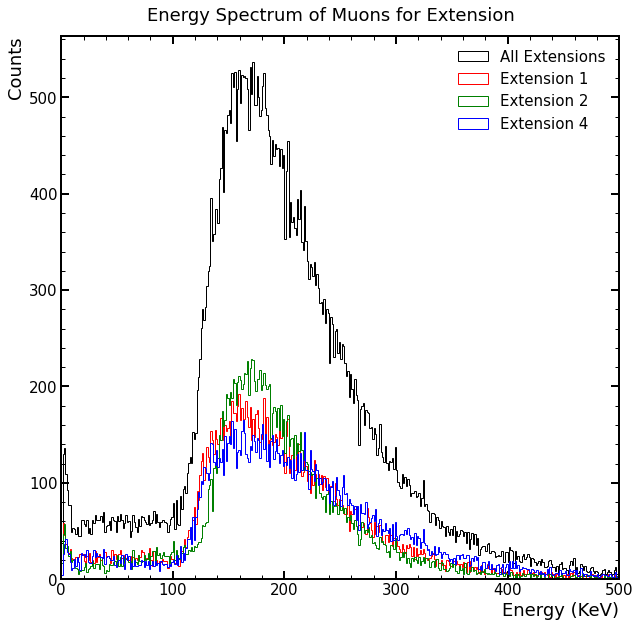

In [41]:
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')
axs.hist(data_1_cal + data_2_cal + data_4_cal, bins = BINS, range = (0,500), 
            color = 'k', label= 'All Extensions', histtype = 'step')

axs.hist(data_muons_extension_1['charge'] / cal_1, bins = BINS, range = (0,500),
            color = 'r', label= 'Extension 1', histtype = 'step')

axs.hist(data_muons_extension_2['charge'] / cal_2, bins = BINS,  range = (0,500), 
            color = 'g', label= 'Extension 2', histtype = 'step')

axs.hist(data_muons_extension_4['charge']  / cal_4, bins = BINS,  range = (0,500),
            color = 'b', label= 'Extension 4', histtype = 'step')

# axs.vlines(x= DelP, ymax=700, ymin=0,  colors='k', linestyles='dashed',  label = 'DeltaP: ' + str(DelP))

axs.legend()

axs.set_xlim(0,500)
axs.set_xlabel('Energy (KeV)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum of Muons for Extension', size = 18, y=0.92)
plt.show()

## Espectro de distancias

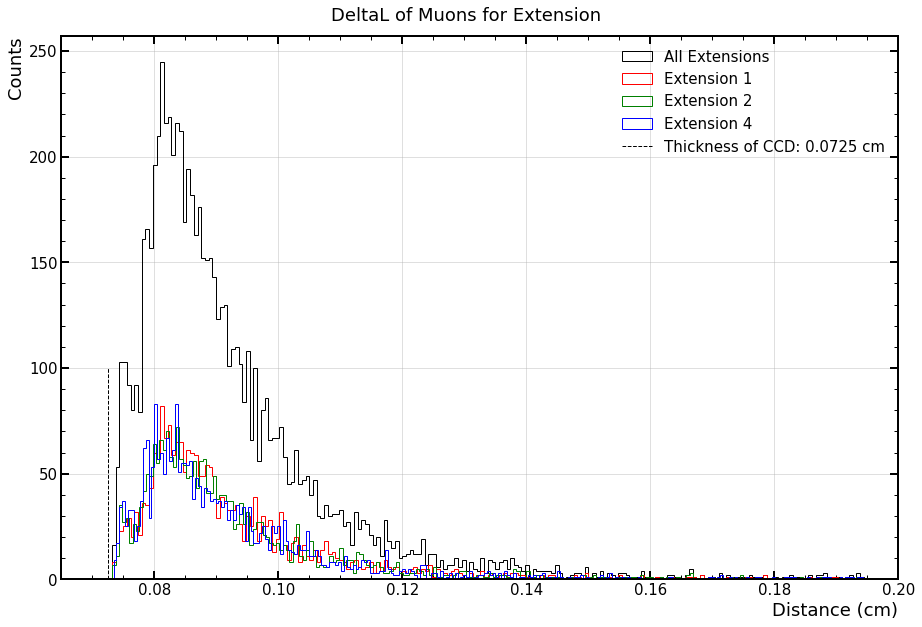

In [16]:
fig, axs = plt.subplots(figsize = [15,10])
BINS = 300
# axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')
axs.hist(data_muons_extension_1['deltaL'] + data_muons_extension_2['deltaL'] + data_muons_extension_4['deltaL'], bins=BINS, color = 'k',
        label = 'All Extensions', histtype = 'step')

axs.hist(data_muons_extension_1['deltaL'], bins = BINS, range= (np.min(data_muons_extension_1['deltaL']), np.max(data_muons_extension_1['deltaL'])), 
            color = 'r', label= 'Extension 1', histtype = 'step')

axs.hist(data_muons_extension_2['deltaL'], bins = BINS, range= (np.min(data_muons_extension_2['deltaL']), np.max(data_muons_extension_2['deltaL'])), 
            color = 'g', label= 'Extension 2', histtype = 'step')

axs.hist(data_muons_extension_4['deltaL'], bins = BINS, range= (np.min(data_muons_extension_4['deltaL']), np.max(data_muons_extension_4['deltaL'])), 
            color = 'b', label= 'Extension 4', histtype = 'step')
            
axs.vlines(x=0.0725, ymax=100, ymin=0,  colors='k', linestyles='dashed',  label = 'Thickness of CCD: 0.0725 cm')

axs.legend()
axs.grid()

axs.set_xlim(0.065,0.2)
axs.set_xlabel('Distance (cm)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('DeltaL of Muons for Extension', size = 18, y=0.92)
plt.show()

## Espectro de Ángulos Theta

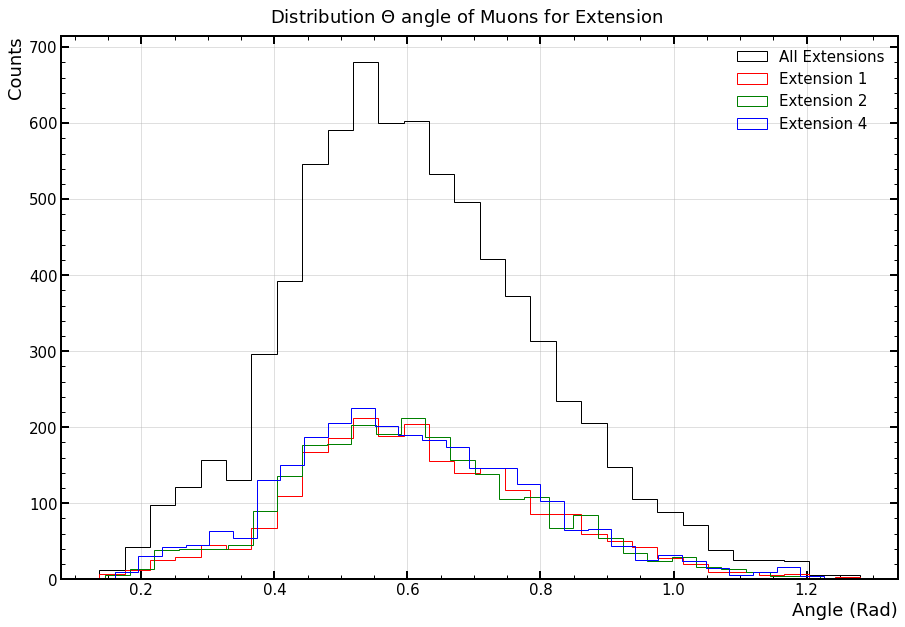

In [17]:
fig, axs = plt.subplots(figsize = [15,10])
BINS = 30

axs.hist(data_muons_extension_1['theta'] + data_muons_extension_2['theta'] + data_muons_extension_4['theta'], bins=BINS, color = 'k',
        label = 'All Extensions', histtype = 'step')

axs.hist(data_muons_extension_1['theta'], bins = BINS, range= (np.min(data_muons_extension_1['theta']), np.max(data_muons_extension_1['theta'])), 
            color = 'r', label= 'Extension 1', histtype = 'step')

axs.hist(data_muons_extension_2['theta'], bins = BINS, range= (np.min(data_muons_extension_2['theta']), np.max(data_muons_extension_2['theta'])), 
            color = 'g', label= 'Extension 2', histtype = 'step')

axs.hist(data_muons_extension_4['theta'], bins = BINS, range= (np.min(data_muons_extension_4['theta']), np.max(data_muons_extension_4['theta'])), 
            color = 'b', label= 'Extension 4', histtype = 'step')
            
# axs.vlines(x=0.0725, ymax=2500, ymin=0,  colors='k', linestyles='dashed',  label = 'Thickness of CCD: 0.0725 cm')
axs.legend()
axs.grid()

# axs.set_xlim(0.065,0.2)
axs.set_xlabel('Angle (Rad)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle(r'Distribution $\Theta$ angle of Muons for Extension', size = 18, y=0.92)
plt.show()

## Espectro de Ángulos Phi

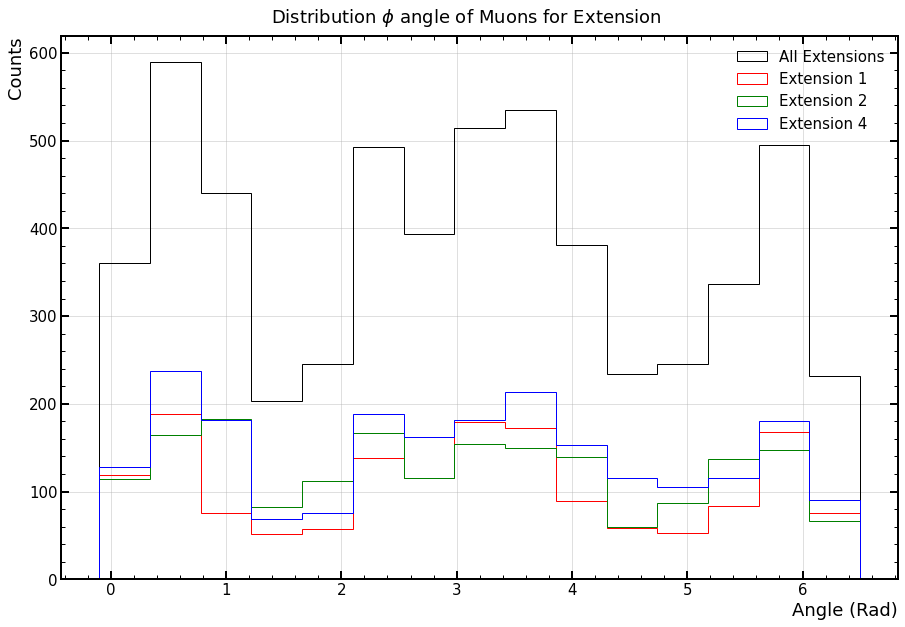

In [18]:
fig, axs = plt.subplots(figsize = [15,10])
BINS = 15

axs.hist(data_muons_extension_1['phi'] + data_muons_extension_2['phi'] + data_muons_extension_4['phi'], bins=BINS, color = 'k',
        label = 'All Extensions', histtype = 'step', range =  (-0.1, 6.5))

axs.hist(data_muons_extension_1['phi'], bins = BINS, range= (-0.1, 6.5), 
            color = 'r', label= 'Extension 1', histtype = 'step')

axs.hist(data_muons_extension_2['phi'], bins = BINS, range=  (-0.1, 6.5), 
            color = 'g', label= 'Extension 2', histtype = 'step')

axs.hist(data_muons_extension_4['phi'], bins = BINS, range=  (-0.1, 6.5), 
            color = 'b', label= 'Extension 4', histtype = 'step')
            
# axs.vlines(x=0.0725, ymax=2500, ymin=0,  colors='k', linestyles='dashed',  label = 'Thickness of CCD: 0.0725 cm')
axs.legend()
axs.grid()

# axs.set_xlim(0)
axs.set_xlabel('Angle (Rad)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle(r'Distribution $\phi$ angle of Muons for Extension', size = 18, y=0.92)
plt.show()

# Todos los espectros anteriores a 2024

In [79]:
histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

In [80]:
data_histogram = data_histogram
type(data_histogram[0])

# data_raw_keV = []
# for i in data_raw_eV:
#     keV = i / 1000
#     data_raw_keV.append(keV)

KeyError: 0

In [ ]:
list_path = path.split('_')
# window_name = 'histogram_Imgs_'+str(list_path[2])+'_Sol_'+str(list_path[4])+'_Elip_'+str(list_path[6][0:5])+'.pkl'
num_images = '1939 analyzed images' 
eventos_rectos = '42388 muons detected'

Optimal Parameters of Landau distribution: Height:  1849.371  EMP:  151.714  $\xi$:  40.842


(0.0, 500.0)

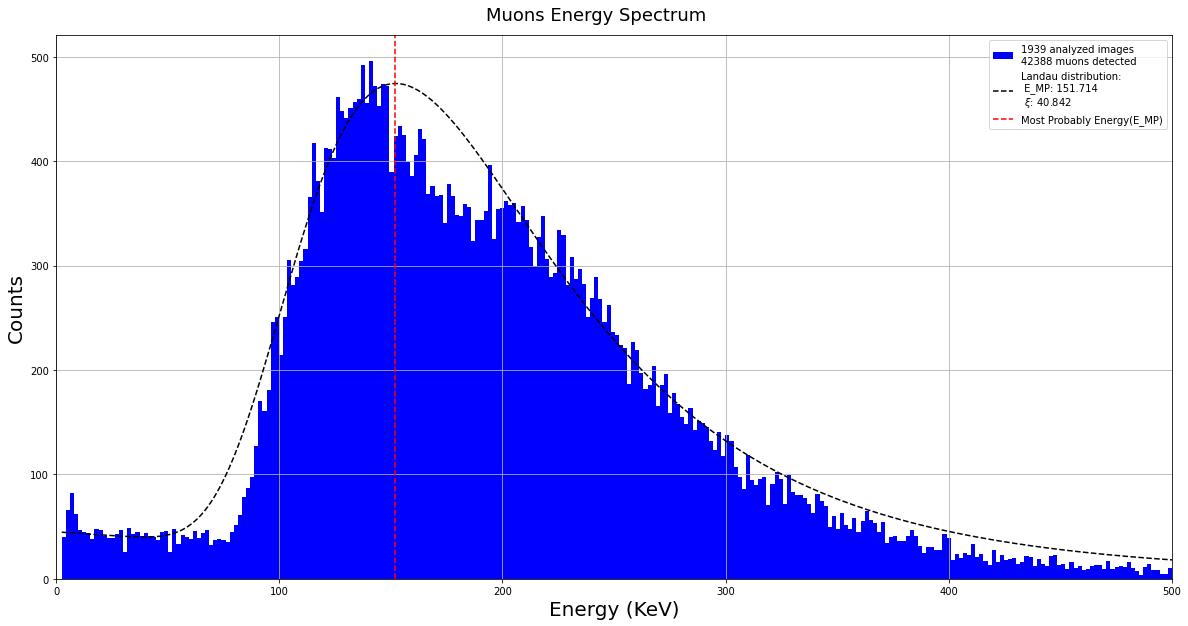

In [ ]:
fig, axs = plt.subplots(1,1, figsize =[20,10])
# fig.canvas.manager.set_window_title(window_name)

fig.suptitle('Muons Energy Spectrum', size = 18, y=0.92)
bin_heights, bin_borders, _ = axs.hist(data_histogram, bins = 11000, color = 'b', label= num_images + '\n' + eventos_rectos) 
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2 

# popt, _ = curve_fit(Landau, bin_centers, bin_heights, p0=[50,10000,1000])
popt, _ = curve_fit(Landgauss, bin_centers, bin_heights)
print('Optimal Parameters of Landau distribution: Height: ', round(popt[0],3), ' EMP: ', round(popt[1],3), r' $\xi$: ', round(popt[2],3))
strAjuste = 'Landau distribution: \n E_MP: ' + str(round(popt[1],3)) + '\n' + r' $\xi$: ' + str(round(popt[2],3))

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
# axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit,*popt),'--k', label=strAjuste)
axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit, 1849.371, 151.714, 40, 45, 300),'--k', label=strAjuste)
axs.axvline(x=popt[1], color = 'r', ls = '--', label = 'Most Probably Energy(E_MP)')
axs.legend(loc="upper right") 
axs.grid()
axs.set_xlabel('Energy (KeV)', loc='center', size = 20)
axs.set_ylabel('Counts', loc='center', size = 20) 
axs.set_xlim([0, 500])  

array([2989.63738494,  151.69909182,   40.64343652,  121.93250242,
         36.20829748])

(0.0, 500.0)

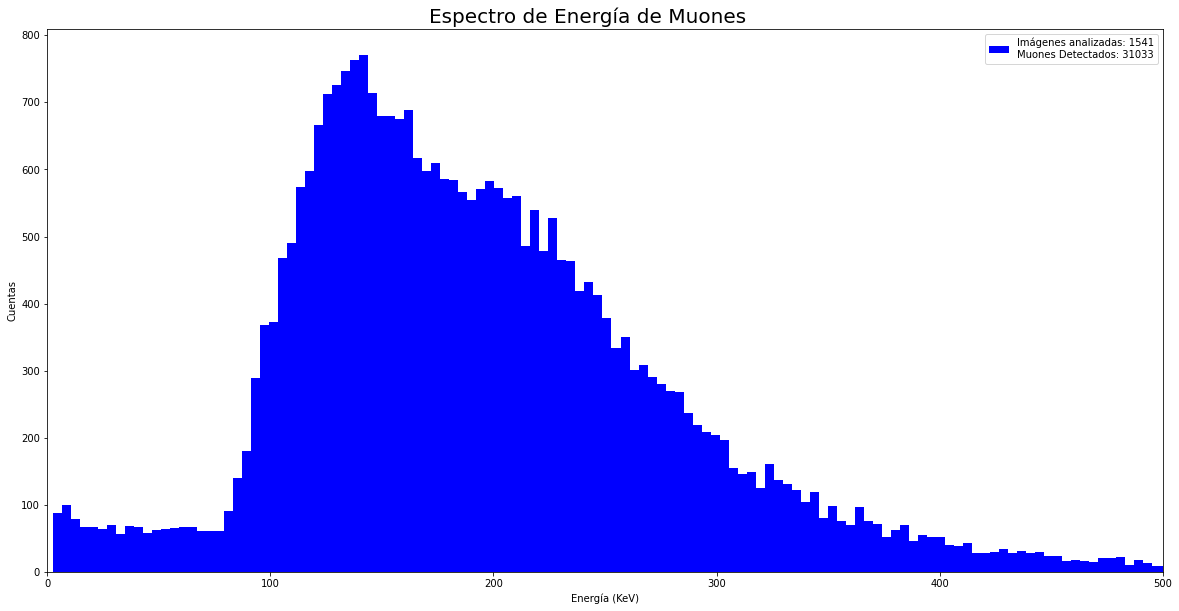

In [ ]:
fig, axs = plt.subplots(1,1, figsize=[20,10])
fig.canvas.manager.set_window_title(window_name)

fig.suptitle('Espectro de Energía de Muones', y = 0.91, size = 20)
bin_heights, bin_borders, _ = axs.hist(data_raw_keV, bins = 5000, color= 'b', label= num_images + '\n' + eventos_rectos) 
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2 

# popt, _ = curve_fit(Landau, bin_centers, bin_heights, p0=[50,10000,1000])
popt_landgauss, _ = curve_fit(Landgauss, bin_centers, bin_heights)
# print('Los parámetros del ajuste son: Altura: ', round(popt[0],3), ' EMP: ', round(popt[1],3), r' $\xi$: ', round(popt[2],3))
display(popt_landgauss)
strAjuste = 'Parámetros del Ajuste: \n'+ \
    r'$N_1$=' + str(round(popt_landgauss[0],3)) + '\n' + \
    r'$E_{MP}$= ' + str(round(popt_landgauss[1],3)) + ' keV, \n' + \
    r'$\xi$= ' + str(round(popt_landgauss[2],3)) + ' keV, \n' + \
    r'$N_2$= ' + str(round(popt_landgauss[3],3)) + '\n' + \
    r'$\epsilon_{\beta}$= ' + str(round(popt_landgauss[4],3)) + ' keV'

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
# axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit,*popt_landgauss),'r', label=strAjuste)

axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit, 3000, 190, 40, 90, 300),'r')

# axs.axvline(x=popt_landgauss[1], color = 'k', ls = '--')

axs.legend(loc="upper right") 
# axs.set_yscale('log')
axs.set_xlabel(r'Energía (KeV)')
axs.set_ylabel('Cuentas') 
axs.set_xlim([0, 500])  

(0.0, 1000.0)

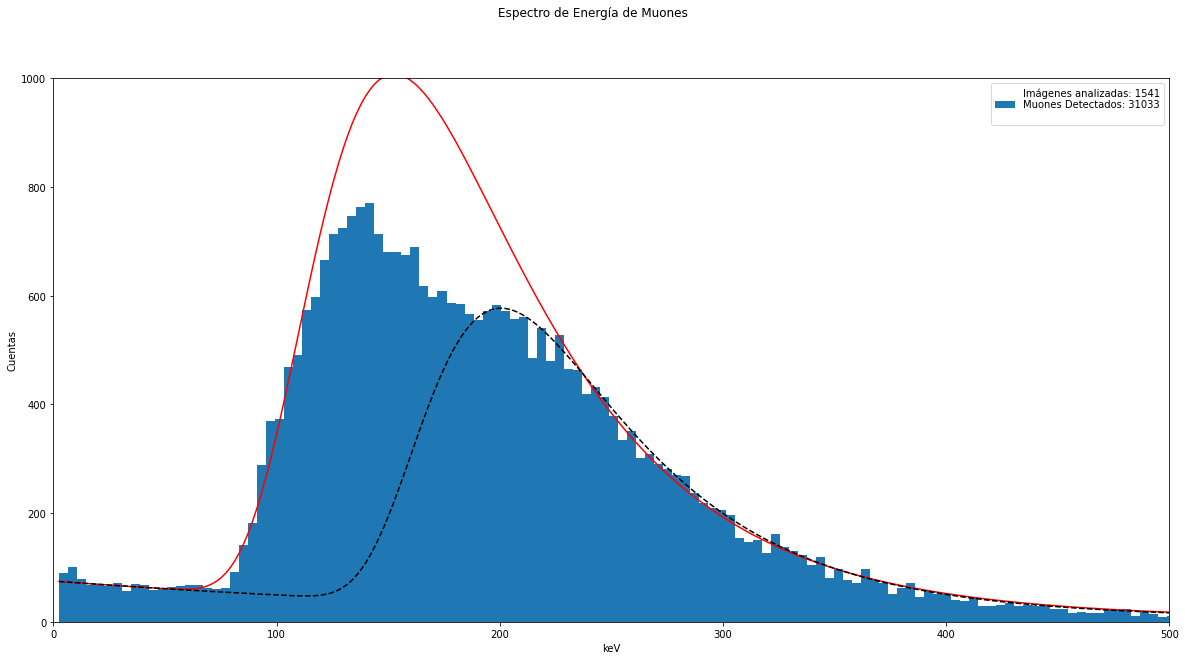

In [ ]:
fig, axs = plt.subplots(1,1, figsize=[20,10])
fig.canvas.manager.set_window_title(window_name)

fig.suptitle('Espectro de Energía de Muones')
bin_heights, bin_borders, _ = axs.hist(data_raw_keV, bins = 5000, label= num_images + '\n' + eventos_rectos + '\n') 
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2 

# popt, _ = curve_fit(Landau, bin_centers, bin_heights, p0=[50,10000,1000])
# popt_landgauss, _ = curve_fit(Landgauss, bin_centers, bin_heights)
# # print('Los parámetros del ajuste son: Altura: ', round(popt[0],3), ' EMP: ', round(popt[1],3), r' $\xi$: ', round(popt[2],3))
# display(popt_landgauss)
# strAjuste = 'Parámetros del Ajuste: \n'+ \
#     r'$N_1$=' + str(round(popt_landgauss[0],3)) + '\n' + \
#     r'$E_{MP}$= ' + str(round(popt_landgauss[1],3)) + ' keV, \n' + \
#     r'$\xi$= ' + str(round(popt_landgauss[2],3)) + ' keV, \n' + \
#     r'$N_2$= ' + str(round(popt_landgauss[3],3)) + '\n' + \
#     r'$\epsilon_{\beta}$= ' + str(round(popt_landgauss[4],3)) + ' keV'

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
# axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit,*popt_landgauss),'r', label=strAjuste)

axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit, 4000, 152, 33, 75, 240),'r')
axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit, 2250, 200, 31, 75, 240),'--k')

# axs.axvline(x=popt_landgauss[1], color = 'k', ls = '--')

axs.legend(loc="upper right") 
# axs.set_yscale('log')
axs.set_xlabel(r'keV')
axs.set_ylabel('Cuentas') 
axs.set_xlim([0, 500])  
axs.set_ylim([0,1000])

In [ ]:
data_raw_keV_truncados = []
for charge in data_raw_keV:
    if charge < 75 or 220 <= charge:
        data_raw_keV_truncados.append(charge)
         

array([1788.38486396,  244.33711528,   20.70962852,  117.10595348,
         49.06501241])

(0.0, 500.0)

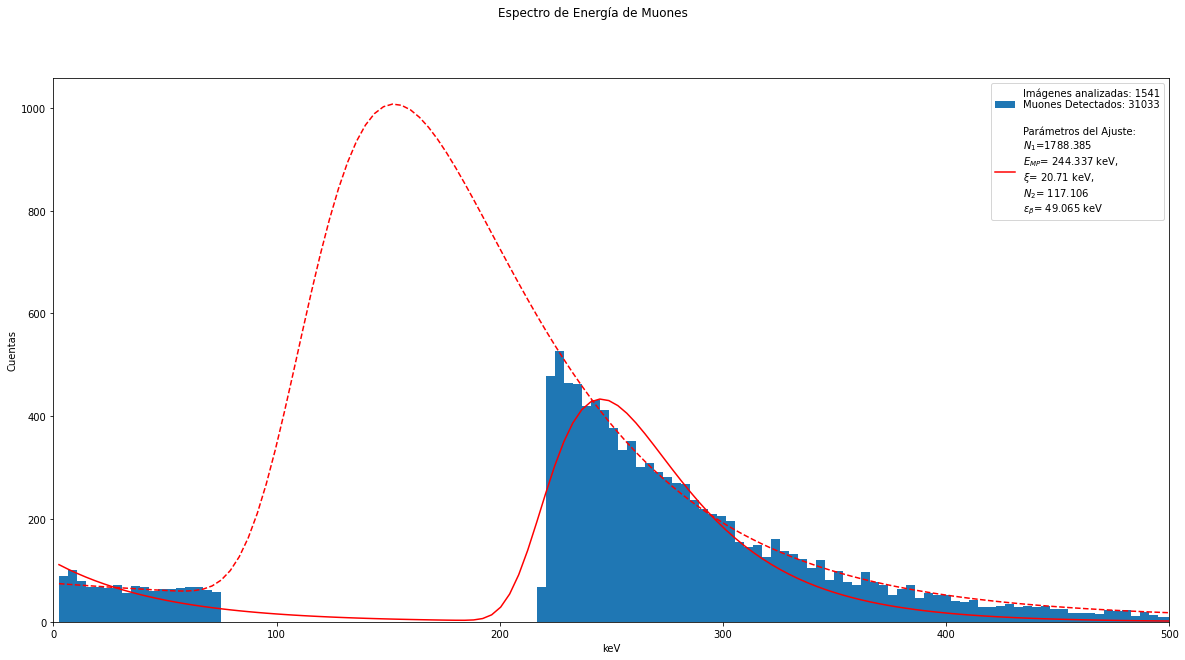

In [ ]:
fig, axs = plt.subplots(1,1, figsize=[20,10])
fig.canvas.manager.set_window_title(window_name)

fig.suptitle('Espectro de Energía de Muones')
bin_heights, bin_borders, _ = axs.hist(data_raw_keV_truncados, bins = 5000, label= num_images + '\n' + eventos_rectos + '\n') 
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2 

# popt, _ = curve_fit(Landau, bin_centers, bin_heights, p0=[50,10000,1000])
popt_landgauss, _ = curve_fit(Landgauss, bin_centers, bin_heights)
# print('Los parámetros del ajuste son: Altura: ', round(popt[0],3), ' EMP: ', round(popt[1],3), r' $\xi$: ', round(popt[2],3))
display(popt_landgauss)
strAjuste = 'Parámetros del Ajuste: \n'+ \
    r'$N_1$=' + str(round(popt_landgauss[0],3)) + '\n' + \
    r'$E_{MP}$= ' + str(round(popt_landgauss[1],3)) + ' keV, \n' + \
    r'$\xi$= ' + str(round(popt_landgauss[2],3)) + ' keV, \n' + \
    r'$N_2$= ' + str(round(popt_landgauss[3],3)) + '\n' + \
    r'$\epsilon_{\beta}$= ' + str(round(popt_landgauss[4],3)) + ' keV'

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 5000)
axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit,*popt_landgauss),'r', label=strAjuste)
axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit, 4000, 152, 33, 75, 240),'--r')
# axs.hist(data_raw_keV, bins = 5000, label= num_images + '\n' + eventos_rectos + '\n') 
# axs.axvline(x=popt_landgauss[1], color = 'k', ls = '--')

axs.legend(loc="upper right") 
# axs.set_yscale('log')
axs.set_xlabel(r'keV')
axs.set_ylabel('Cuentas') 
axs.set_xlim([0, 500])  

In [ ]:
for elemento in range(0, len(popt)):
    print(popt[elemento], popt_landgauss[elemento])

2988.409508593345 2989.6373849351457
151.1395387379791 151.69909182260133
41.02070066504348 40.643436516943495


/tmp/ipykernel_22043/2889963288.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_landau = pland.landau(x)
/tmp/ipykernel_22043/2889963288.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_langaus = pland.langau(x)


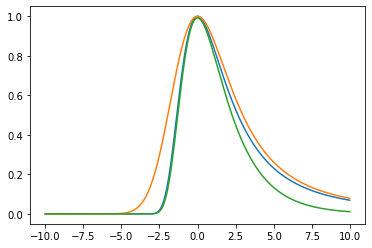

In [ ]:
x = np.arange(-10, 10, 0.01)
y_landau = pland.landau(x)
y_langaus = pland.langau(x)
y_me_landau = Landau(x,4.1,-1,1)
plt.plot(x,y_landau)
plt.plot(x,y_langaus)
plt.plot(x,y_me_landau)
# plt.xlim(0,10000)

In [ ]:
histogram_all = open(path_All_Events, 'rb')
data_All_histogram = pck.load(histogram_all)
histogram_all.close()

histogram_straight = open(path_Straight_events, 'rb')
data_straight_histogram = pck.load(histogram_straight)
histogram_straight.close()

histogram_strcir = open(path_StraCirc_Events, 'rb')
data_strcirc_histogram = pck.load(histogram_strcir)
histogram_strcir.close()


data_All_raw_eV = data_All_histogram
data_straight_raw_eV = data_straight_histogram
data_strcirc_raw_eV = data_strcirc_histogram

print(len(data_All_raw_eV))
# print(len(data_raw_eV))
data_All_raw_keV = []
data_straight_raw_keV = []
data_strcirc_raw_keV = []

for i in data_All_raw_eV:
    keV = i / 1000
    data_All_raw_keV.append(keV)
del data_All_raw_eV

for i in data_straight_raw_eV:
    keV = i / 1000
    data_straight_raw_keV.append(keV)
del data_straight_raw_eV

# for i in data_strcirc_raw_eV:
#     keV = i / 1000
#     data_strcirc_raw_eV.append(keV)

17621


In [ ]:
for i in data_strcirc_raw_eV:
    keV = i / 1000
    data_strcirc_raw_keV.append(keV)

: 

Text(0.5, 0.98, 'Espectro de Energías')

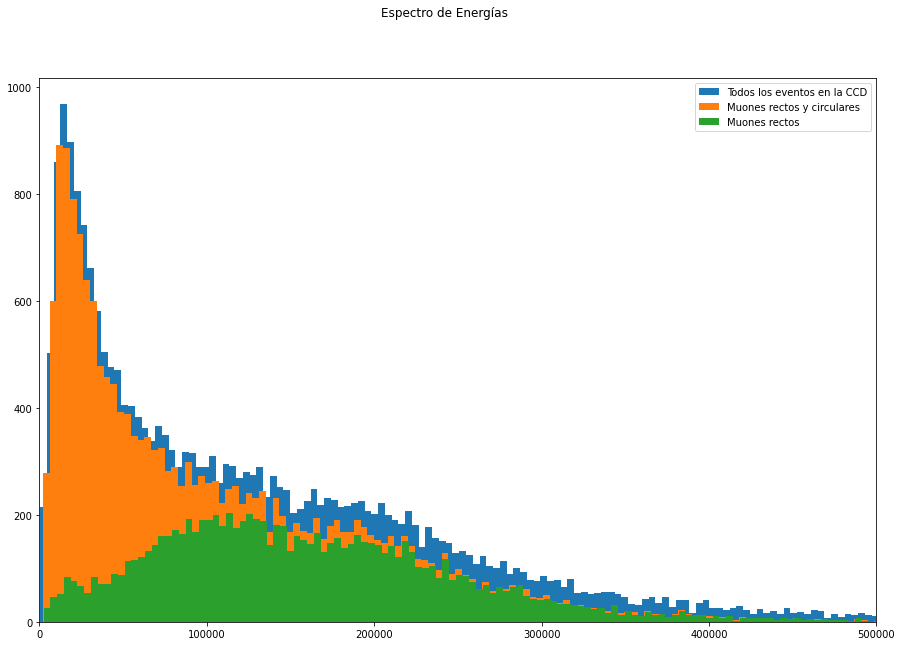

In [ ]:
fig, axs = plt.subplots(figsize = [15,10])
axs.hist(data_All_raw_eV, bins=5000, label='Todos los eventos en la CCD')
axs.hist(data_strcirc_raw_eV, bins=5000, label='Muones rectos y circulares')
axs.hist(data_straight_raw_eV, bins=5000, label='Muones rectos')
axs.set_xlim([0,500000])
# axs.set_yscale('log')
# axs.set_xscale('log')
axs.legend()
fig.suptitle('Espectro de Energías')
# fig.legend()

In [ ]:
histogram_all = open(path_All_Events, 'rb')
data_All_histogram = pck.load(histogram_all)
histogram_all.close()

histogram_straight = open(path_Straight_events, 'rb')
data_straight_histogram = pck.load(histogram_straight)
histogram_straight.close()

# histogram_strcir = open(path_StraCirc_Events, 'rb')
# data_strcirc_histogram = pck.load(histogram_strcir)
# histogram_strcir.close()

data_All_raw_eV = data_All_histogram
data_straight_raw_eV = data_straight_histogram
# data_strcirc_raw_eV = data_strcirc_histogram

Text(0.5, 0.98, 'Espectro de Energías')

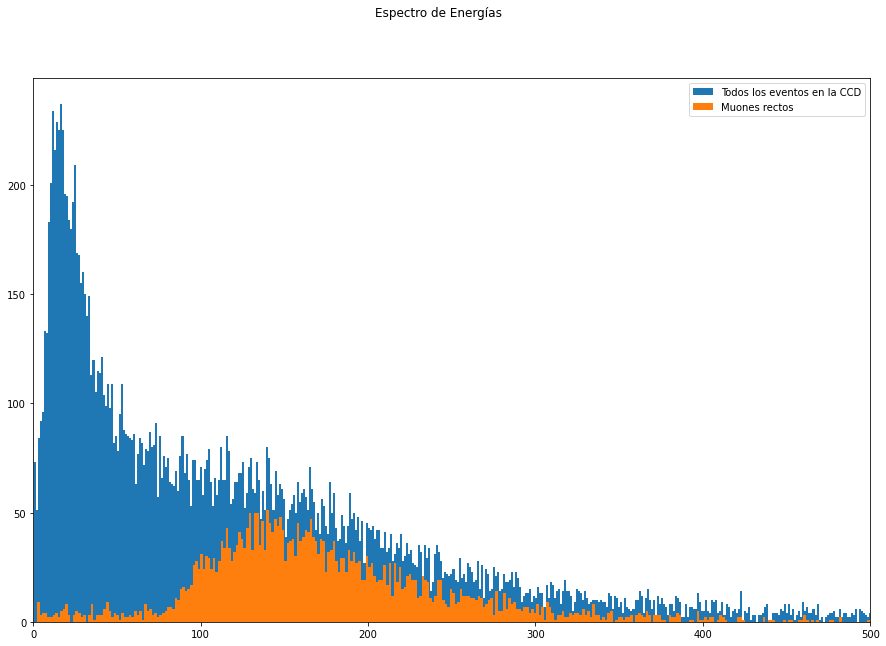

In [ ]:
fig, axs = plt.subplots(figsize = [15,10])
axs.hist(data_All_raw_eV, bins=3000, label='Todos los eventos en la CCD')
# axs.hist(data_strcirc_raw_eV, bins=5000, label='Muones rectos y circulares')
axs.hist(data_straight_raw_eV, bins=1000, label='Muones rectos')
axs.set_xlim([0,500])
# axs.set_yscale('log')
# axs.set_xscale('log')
axs.legend()
fig.suptitle('Espectro de Energías')
# fig.legend()

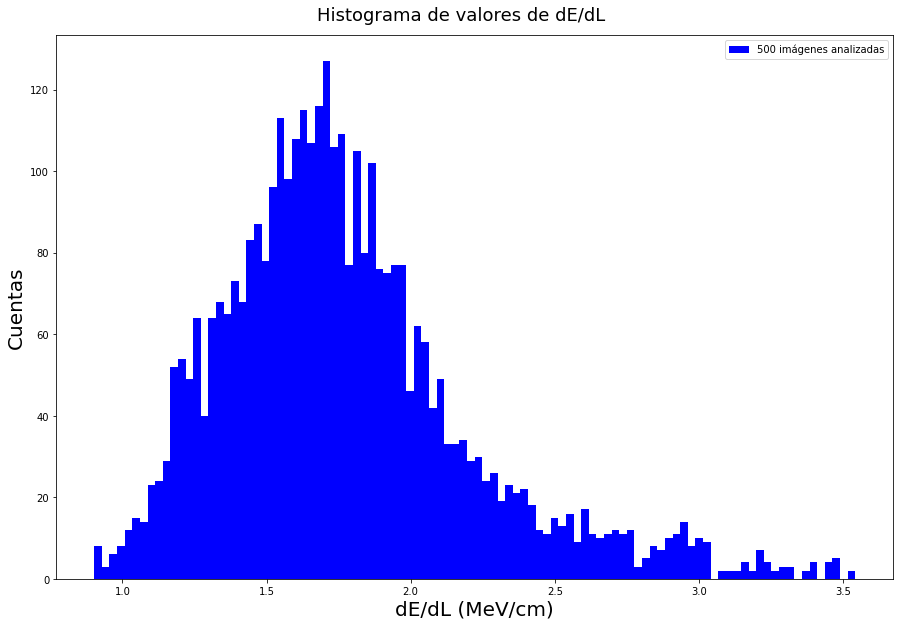

In [ ]:
fig, axs = plt.subplots(figsize = [15,10])
path_DeltaEL = 'data_histogram_Imgs_500_Sol_0.7_Elip_4.5_DeltaDL_0.93.55.pkl'

histogram_delta = open(path_DeltaEL, 'rb')
data_delta_histogram = pck.load(histogram_delta)
histogram_delta.close()

jistograma = axs.hist(data_delta_histogram[1], bins=100, color='b', label='500 imágenes analizadas')
axs.set_xlabel('dE/dL (MeV/cm)', loc='center', size = 20)
axs.set_ylabel('Cuentas', loc='center', size = 20)
# axs.hist(data_strcirc_raw_eV, bins=5000, label='Muones rectos y circulares')
# axs.set_xlim([0,500])
# axs.set_yscale('log')
# axs.set_xscale('log')
fig.suptitle('Histograma de valores de dE/dL', size = 18, y=0.92)
axs.legend()
# fig.legend()

In [ ]:
jistograma[1].mean()
jistograma[0].max()

127.0

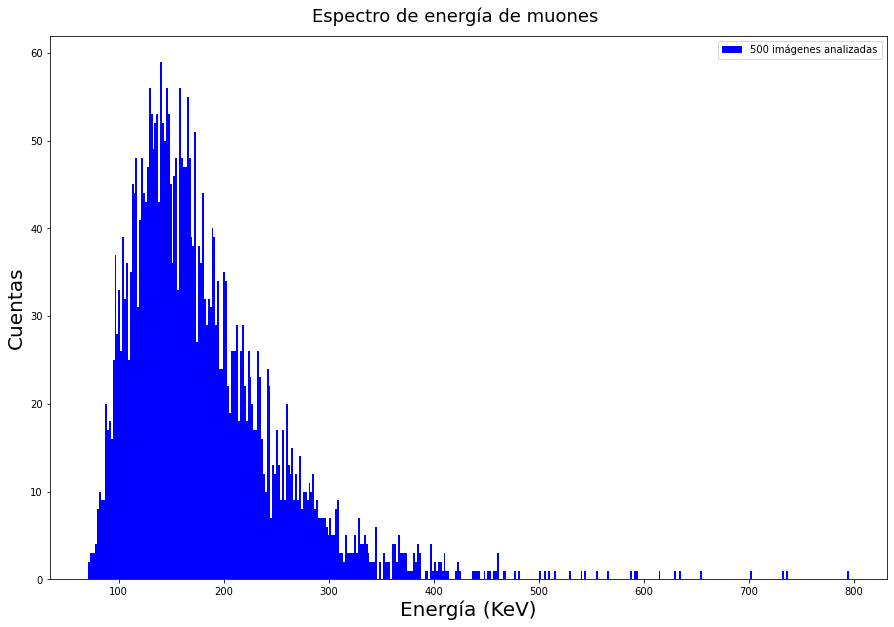

In [ ]:
fig, axs = plt.subplots(figsize = [15,10])

axs.hist(data_delta_histogram[0], bins=400, color='b', label='500 imágenes analizadas')
axs.set_xlabel('Energía (KeV)', loc='center', size = 20)
axs.set_ylabel('Cuentas', loc='center', size = 20)
# axs.hist(data_strcirc_raw_eV, bins=5000, label='Muones rectos y circulares')
# axs.set_xlim([0,500])
# axs.set_yscale('log')
# axs.set_xscale('log')
fig.suptitle('Espectro de energía de muones', size = 18, y=0.92)
axs.legend()
# fig.legend()

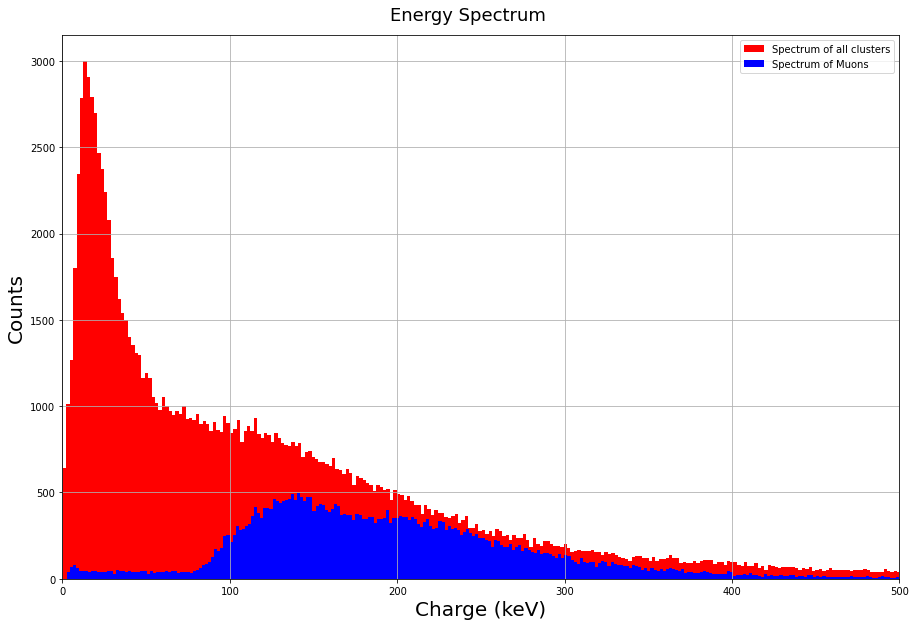

In [ ]:
path_muons = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/data_muons_Imgs_1939_Sol_0.7_Elip_4.5_.pkl'
path_all = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/data_AlEvents_Imgs_1939_.pkl'
histogram_muons = open(path_muons, 'rb')
data_muons_histogram = pck.load(histogram_muons)
histogram_muons.close()

histogram_all = open(path_all, 'rb')
data_all_histogram = pck.load(histogram_all)
histogram_all.close()

fig, axs = plt.subplots(figsize = [15,10])
axs.hist(data_all_histogram, bins = 11000, color='r', label = 'Spectrum of all clusters')
axs.hist(data_muons_histogram['charge'], bins = 11000, color='b', label = 'Spectrum of Muons')
# label='1939 analyzed images \n' + str(data_muons_histogram['Muons_Detected']) + ' muons detected'

axs.set_xlabel('Charge (keV)', loc='center', size = 20)
axs.set_ylabel('Counts', loc='center', size = 20)
# axs.hist(data_strcirc_raw_eV, bins=5000, label='Muones rectos y circulares')
axs.set_xlim([0,500])
# axs.set_yscale('log')
# axs.set_xscale('log')
fig.suptitle('Energy Spectrum', size = 18, y=0.92)
axs.legend()
axs.grid()
# fig.legend()
plt.show()

In [ ]:
new_data_muons_histogram = []
for element in data_muons_histogram['charge']:
    if element <= 50:
        new_data_muons_histogram.append(element)

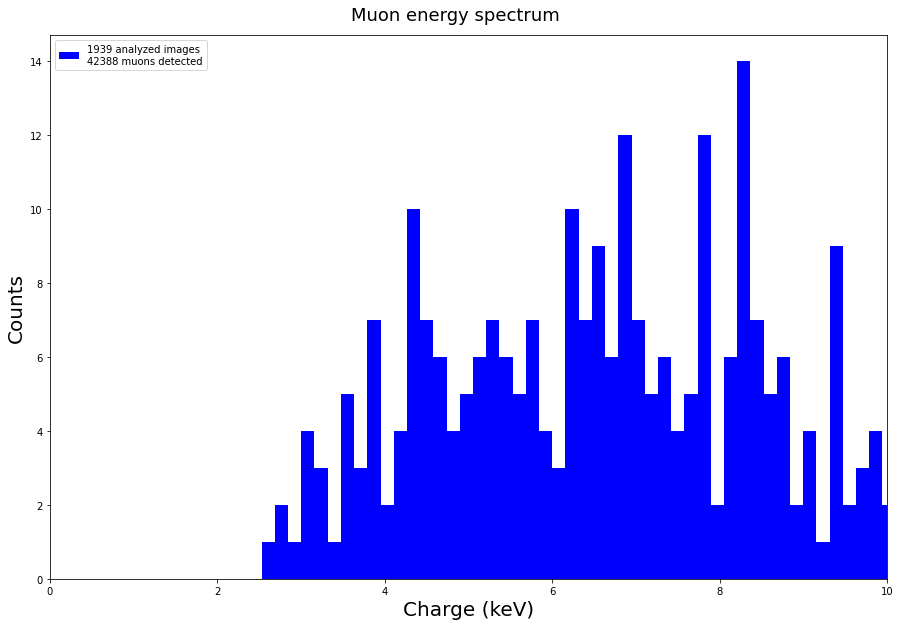

In [ ]:
fig, axs = plt.subplots(figsize = [15,10])
axs.hist(new_data_muons_histogram, bins = 300, color='b', label='1939 analyzed images \n' + str(data_muons_histogram['Muons_Detected']) + \
                                                                    ' muons detected')
axs.set_xlabel('Charge (keV)', loc='center', size = 20)
axs.set_ylabel('Counts', loc='center', size = 20)
# axs.hist(data_strcirc_raw_eV, bins=5000, label='Muones rectos y circulares')
axs.set_xlim([0,10])
# axs.set_yscale('log')
# axs.set_xscale('log')
fig.suptitle('Muon energy spectrum', size = 18, y=0.92)
axs.legend()
# fig.legend()

(0.0, 500.0)

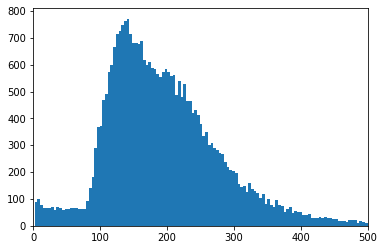

In [ ]:
plt.hist(data_raw_keV, bins=5000)
plt.xlim([0,500])

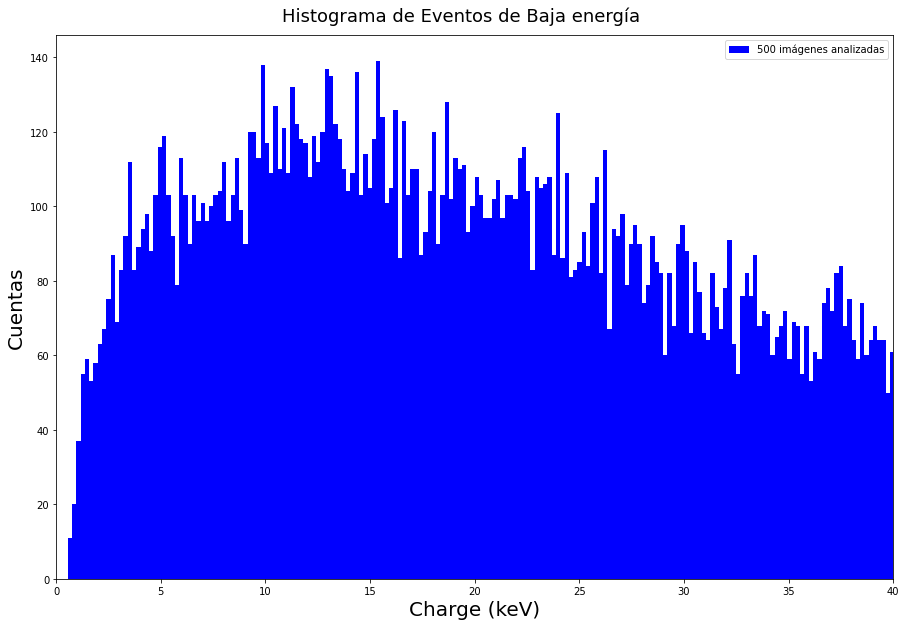

In [ ]:
fig, axs = plt.subplots(figsize = [15,10])
path_fluorecenia = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/data_fluorescense_hist_img_1939_.pkl'

histogram_fluo = open(path_fluorecenia, 'rb')
data_fluo_histogram = pck.load(histogram_fluo)
histogram_fluo.close()

jistograma = axs.hist(data_fluo_histogram, bins = 15000, color='b', label='500 imágenes analizadas')
axs.set_xlabel('Charge (keV)', loc='center', size = 20)
axs.set_ylabel('Cuentas', loc='center', size = 20)
# axs.hist(data_strcirc_raw_eV, bins=5000, label='Muones rectos y circulares')
axs.set_xlim([0,40])
# axs.set_yscale('log')
# axs.set_xscale('log')
fig.suptitle('Histograma de Eventos de Baja energía', size = 18, y=0.92)
axs.legend()
# fig.legend()

In [ ]:
new_data_fluo_histogram = []
for element in data_fluo_histogram[0]:
    if element < 10:
        new_data_fluo_histogram.append(element)

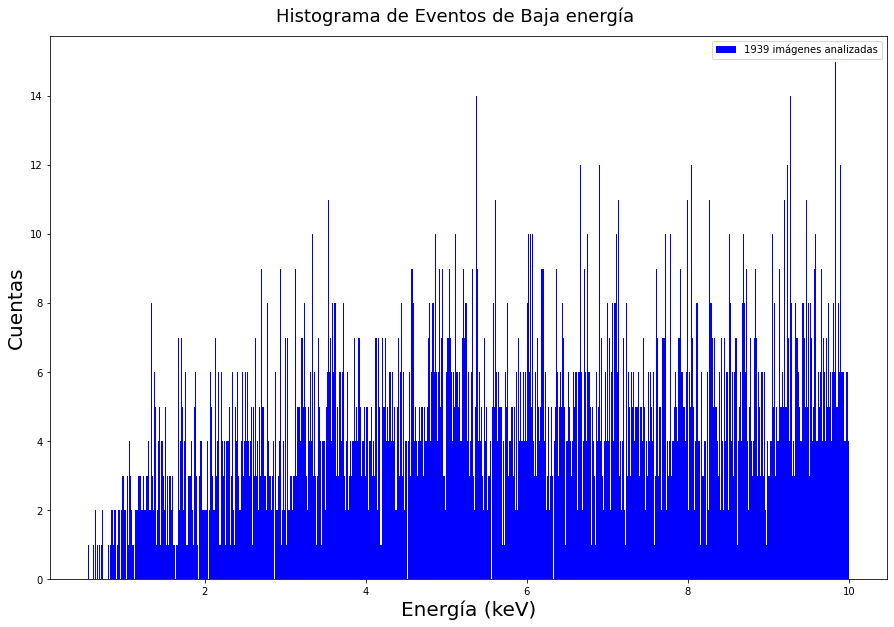

In [ ]:
fig, axs = plt.subplots(figsize = [15,10])
jistograma = axs.hist(new_data_fluo_histogram, bins = 900, color='b', label='1939 imágenes analizadas')
axs.set_xlabel('Energía (keV)', loc='center', size = 20)
axs.set_ylabel('Cuentas', loc='center', size = 20)
# axs.hist(data_strcirc_raw_eV, bins=5000, label='Muones rectos y circulares')
# axs.set_xlim([0,35])
# axs.set_yscale('log')
# axs.set_xscale('log')
fig.suptitle('Histograma de Eventos de Baja energía', size = 18, y=0.92)
axs.legend()
# fig.legend()

plt.show()

array([2989.63738494,  151.69909182,   40.64343652,  121.93250242,
         36.20829748])

(0.0, 500.0)

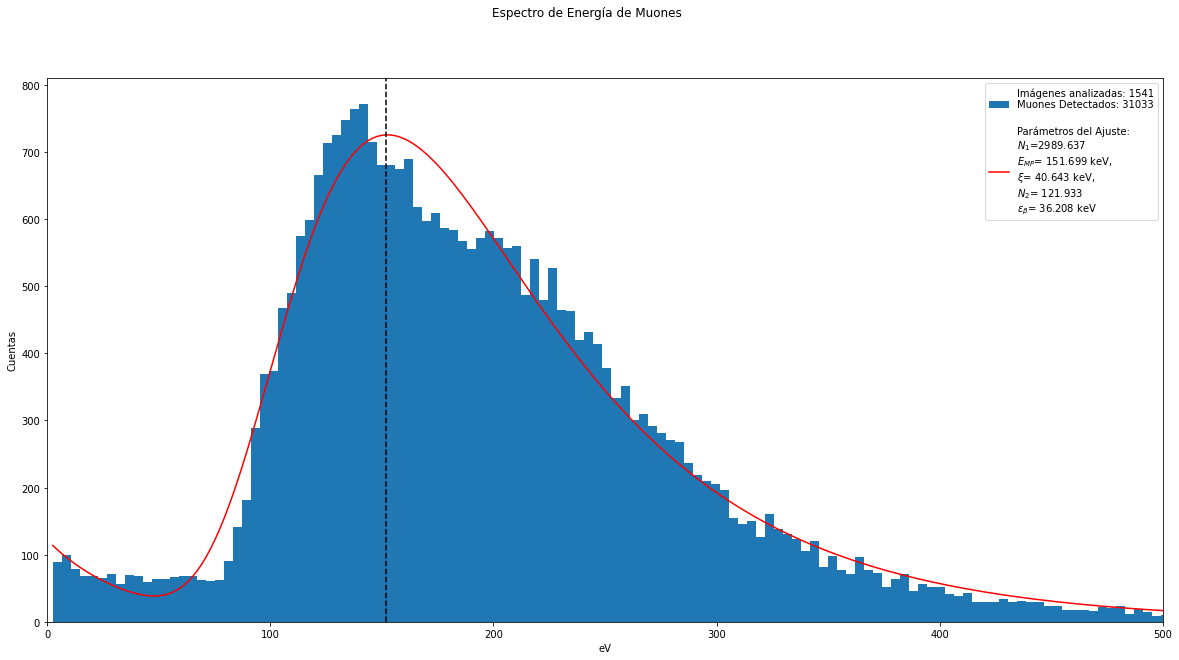

In [ ]:
fig, axs = plt.subplots(1,1, figsize=[20,10])
fig.canvas.manager.set_window_title(window_name)

fig.suptitle('Espectro de Energía de Muones')
bin_heights, bin_borders, _ = axs.hist(data1_raw_keV, bins = 5000, label= num_images + '\n' + eventos_rectos + '\n') 
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2 

# popt, _ = curve_fit(Landau, bin_centers, bin_heights, p0=[50,10000,1000])
popt_landgauss, _ = curve_fit(Landgauss, bin_centers, bin_heights)
# print('Los parámetros del ajuste son: Altura: ', round(popt[0],3), ' EMP: ', round(popt[1],3), r' $\xi$: ', round(popt[2],3))
display(popt_landgauss)
strAjuste = 'Parámetros del Ajuste: \n'+ \
    r'$N_1$=' + str(round(popt_landgauss[0],3)) + '\n' + \
    r'$E_{MP}$= ' + str(round(popt_landgauss[1],3)) + ' keV, \n' + \
    r'$\xi$= ' + str(round(popt_landgauss[2],3)) + ' keV, \n' + \
    r'$N_2$= ' + str(round(popt_landgauss[3],3)) + '\n' + \
    r'$\epsilon_{\beta}$= ' + str(round(popt_landgauss[4],3)) + ' keV'

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit,*popt_landgauss),'r', label=strAjuste)

# axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit, 3000, 190, 40, 90, 300),'r')

axs.axvline(x=popt_landgauss[1], color = 'k', ls = '--')

axs.legend(loc="upper right") 
# axs.set_yscale('log')
axs.set_xlabel(r'eV')
axs.set_ylabel('Cuentas') 
axs.set_xlim([0, 500])  

In [ ]:
# c1 = ROOT.TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
hpx = ROOT.TH1F( 'hpx', 'This is the px distribution', 100, -4, 4 )
for i in data_raw_eV:
    hpx.Fill(i)

hpx.DrawCopy()

Warning in <TROOT::Append>: Replacing existing TH1: hpx (Potential memory leak).


In [ ]:
path_data_Extension_2 = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/data_muons_Extensions_2_Imgs_2083_Sol_0.7_Elip_4.5_.pkl'
histogram_extensiom_2 = open(path_data_Extension_2, 'rb')
data_muons_extension_2 = pck.load(histogram_extensiom_2)
histogram_extensiom_2.close()

path_data_Extensions_1_4 = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/data_muons_Extensions_1_4_Imgs_2083_Sol_0.7_Elip_4.5_.pkl'
histogram_extensions_1_4 = open(path_data_Extensions_1_4, 'rb')
data_muons_extension_1_4 = pck.load(histogram_extensions_1_4)
histogram_extensions_1_4.close()

path_data_All_extension = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/data_muons_Imgs_2083_Sol_0.7_Elip_4.5_.pkl'
histogram_all_extension = open(path_data_All_extension, 'rb')
data_muons_all_extension = pck.load(histogram_all_extension)
histogram_all_extension.close()


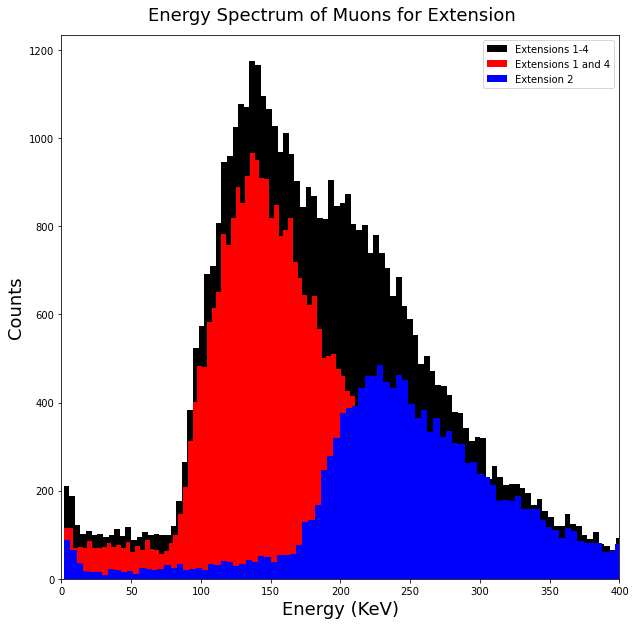

In [ ]:
fig, axs = plt.subplots(figsize = [10,10])
axs.hist(data_muons_all_extension['charge'], bins = 5000, color = 'k', label = 'Extensions 1-4')
axs.hist(data_muons_extension_1_4['charge'], bins = 1000, color = 'r', label= 'Extensions 1 and 4')
axs.hist(data_muons_extension_2['charge'], bins = 4500, color = 'b', label = 'Extension 2')
axs.legend()

axs.set_xlim(0,400)
axs.set_xlabel('Energy (KeV)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum of Muons for Extension', size = 18, y=0.92)
plt.show()

In [ ]:
print(data_muons_all_extension.keys())
print('Mean of dE/dL for Extension 2 (dEL_2): ', np.mean(data_muons_extension_2['DeltaEL']))
print('Mean of dE/dL for Extension 1,4 (dEL_14): ', np.mean(data_muons_extension_1_4['DeltaEL']))
print('Ratio dEL_2/dEL_14: ', np.mean(data_muons_extension_2['DeltaEL'])/np.mean(data_muons_extension_1_4['DeltaEL']))
print('Ratio dEL_14/dEL_2: ', np.mean(data_muons_extension_1_4['DeltaEL'])/np.mean(data_muons_extension_2['DeltaEL']))

dict_keys(['Muons_Detected', 'charge', 'DeltaEL'])
Mean of dE/dL for Extension 2 (dEL_2):  2.7569843698580483
Mean of dE/dL for Extension 1,4 (dEL_14):  1.6348791413185033
Ratio dEL_2/dEL_14:  1.686353627115571
Ratio dEL_14/dEL_2:  0.5929954334136033


In [ ]:
tru_data_muons_extension_1_4 = []
for charge in data_muons_extension_1_4['charge']:
    true_charge = charge * 2.1
    tru_data_muons_extension_1_4.append(true_charge)

tru_data_muons_extension_2 = []
for charge in data_muons_extension_2['charge']:
    true_charge = charge * 1.6
    tru_data_muons_extension_2.append(true_charge)

correction_data = tru_data_muons_extension_1_4 + data_muons_extension_2['charge']
# correction_data = tru_data_muons_extension_1_4 + tru_data_muons_extension_2

In [ ]:
hist , bins_edges = np.histogram(tru_data_muons_extension_1_4, bins = 2000)
print(bins_edges[np.argmax(hist)])
# np.mean(bins_edges)
hist , bins_edges = np.histogram(tru_data_muons_extension_2, bins = 2000)
print(bins_edges[np.argmax(hist)])

hist , bins_edges = np.histogram(correction_data, bins = 4000)
print(bins_edges[np.argmax(hist)])

294.4051601732433
358.4771864177704
264.42753601765634


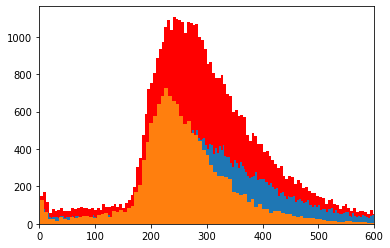

In [ ]:
plt.hist(correction_data, bins = 4000, color = 'r', label= 'Extensions 1 and 4')
plt.hist(tru_data_muons_extension_1_4, bins = 2000)
plt.hist(data_muons_extension_2['charge'], bins = 3000)
plt.xlim(0,600)
plt.show()

In [ ]:
true_dE_dL_extension_2 = []


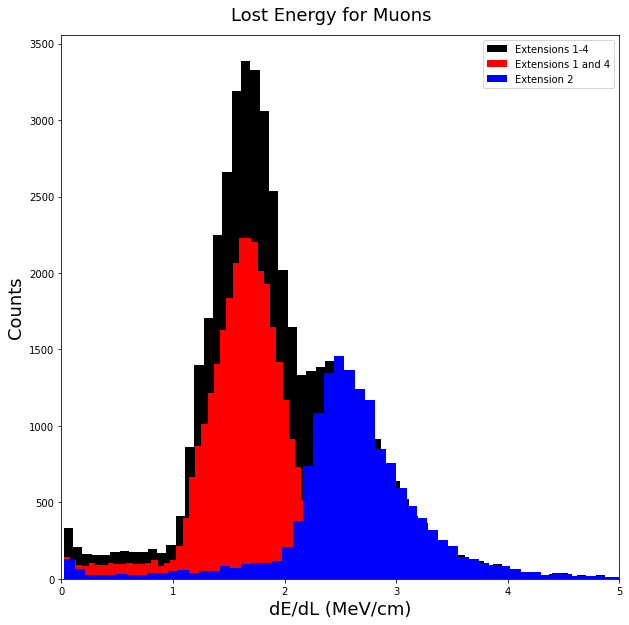

In [ ]:
fig, axs = plt.subplots(figsize = [10,10])
axs.hist(data_muons_all_extension['DeltaEL'], bins = 1000, color = 'k', label = 'Extensions 1-4')
axs.hist(data_muons_extension_1_4['DeltaEL'], bins = 200, color = 'r', label= 'Extensions 1 and 4')
axs.hist(data_muons_extension_2['DeltaEL'], bins = 900, color = 'b', label = 'Extension 2')
axs.legend()

axs.set_xlim(0,5)
axs.set_xlabel('dE/dL (MeV/cm)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Lost Energy for Muons', size = 18, y=0.92)
plt.show()

In [ ]:
path_ext1_to_4 = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/dict_muons_Extensions_1_to_4_Imgs_2083_Sol_0.7_Elip_4.5_ADUs__DL.pkl'
# path_ext1_to_4 = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict_muons_Extensions_1_to_4_Imgs_3_Sol_0.7_Elip_4.5_ADUs__.pkl'

data_muons_ext1_to_4 = open(path_ext1_to_4, 'rb')
dict_muons_ext1_to_4 = pck.load(data_muons_ext1_to_4)
data_muons_ext1_to_4.close()

In [ ]:
deltaEL_all_extension =  dict_muons_ext1_to_4['extension_1']['deltaEL'] + dict_muons_ext1_to_4['extension_2']['deltaEL'] + \
                        dict_muons_ext1_to_4['extension_4']['deltaEL']

print('Keys of principal dict: ', dict_muons_ext1_to_4.keys())
print('Keys for each extension: ', dict_muons_ext1_to_4['extension_1'].keys())

Keys of principal dict:  dict_keys(['All_Muons_Detected', 'extension_1', 'extension_2', 'extension_4'])
Keys for each extension:  dict_keys(['charge', 'deltaEL', 'deltaL'])


In [ ]:
print(len(dict_muons_ext1_to_4['extension_1']['deltaEL']))
print(len(dict_muons_ext1_to_4['extension_1']['charge']))
print(dict_muons_ext1_to_4['extension_1']['deltaEL'][0])
print('Total muons detected: ', dict_muons_ext1_to_4['All_Muons_Detected'])

16340
16340
189238346.55242765
Total muons detected:  48389


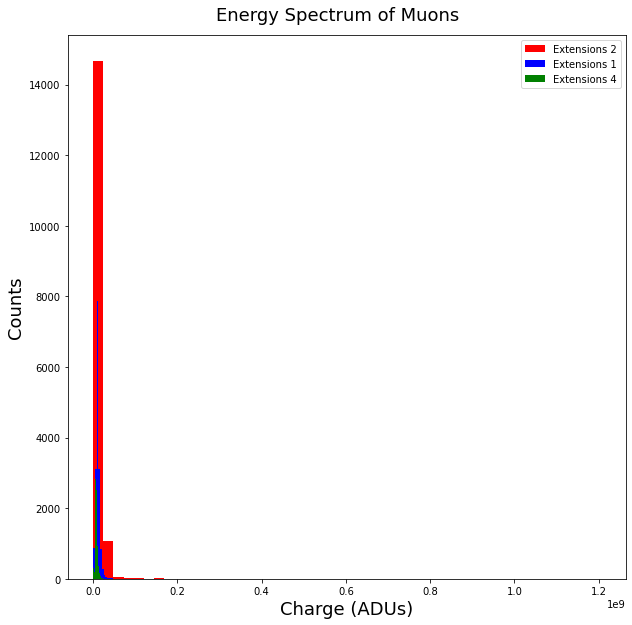

In [ ]:
fig, axs = plt.subplots(figsize = [10,10])
axs.hist(dict_muons_ext1_to_4['extension_2']['charge'], bins = 50, color = 'r', label= 'Extensions 2')
axs.hist(dict_muons_ext1_to_4['extension_1']['charge'], bins = 50, color = 'b', label= 'Extensions 1')
axs.hist(dict_muons_ext1_to_4['extension_4']['charge'], bins = 50, color = 'g', label= 'Extensions 4')
axs.legend()

# axs.set_xlim(0,5)
axs.set_xlabel('Charge (ADUs)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum of Muons', size = 18, y=0.92)
plt.show()

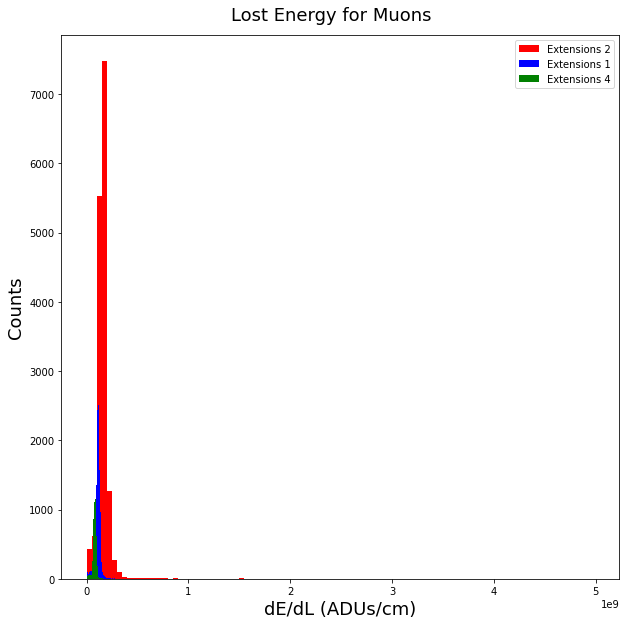

In [ ]:
fig, axs = plt.subplots(figsize = [10,10])
axs.hist(dict_muons_ext1_to_4['extension_2']['deltaEL'], bins = 100, color = 'r', label= 'Extensions 2')
axs.hist(dict_muons_ext1_to_4['extension_1']['deltaEL'], bins = 100, color = 'b', label= 'Extensions 1')
axs.hist(dict_muons_ext1_to_4['extension_4']['deltaEL'], bins = 100, color = 'g', label= 'Extensions 4')
axs.legend()

# axs.set_xlim(0,5)
axs.set_xlabel('dE/dL (ADUs/cm)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Lost Energy for Muons', size = 18, y=0.92)
plt.show()

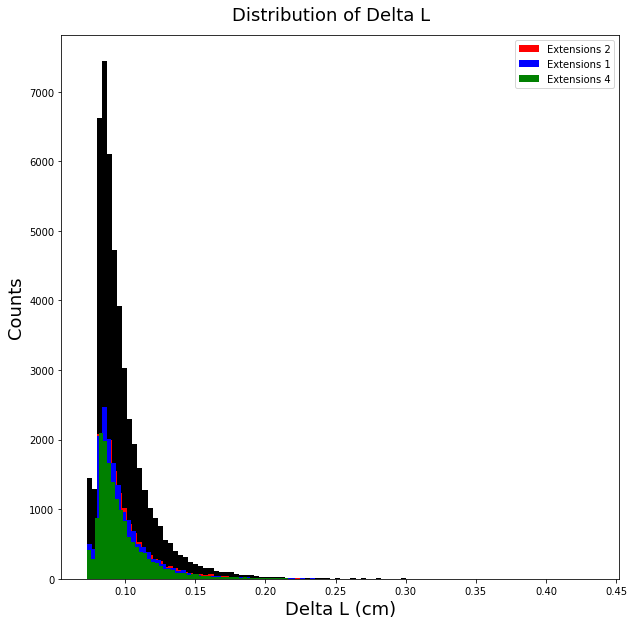

In [ ]:
fig, axs = plt.subplots(figsize = [10,10])
axs.hist(dict_muons_ext1_to_4['extension_1']['deltaL'] + dict_muons_ext1_to_4['extension_2']['deltaL'] + dict_muons_ext1_to_4['extension_4']['deltaL'], bins = 100, color = 'k')
axs.hist(dict_muons_ext1_to_4['extension_2']['deltaL'], bins = 100, color = 'r', label= 'Extensions 2')
axs.hist(dict_muons_ext1_to_4['extension_1']['deltaL'], bins = 100, color = 'b', label= 'Extensions 1')
axs.hist(dict_muons_ext1_to_4['extension_4']['deltaL'], bins = 100, color = 'g', label= 'Extensions 4')
axs.legend()

# axs.set_xlim(0,5)
axs.set_xlabel('Delta L (cm)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Distribution of Delta L', size = 18, y=0.92)
plt.show()

In [ ]:
clean_DL_ext_1 = []
for deltaL in dict_muons_ext1_to_4['extension_1']['deltaL']:
    if deltaL < 0.20:
        clean_DL_ext_1.append(deltaL)
        
clean_DL_ext_2 = []
for deltaL in dict_muons_ext1_to_4['extension_2']['deltaL']:
    if deltaL < 0.2:
        clean_DL_ext_2.append(deltaL)

clean_DL_ext_4 = []
for deltaL in dict_muons_ext1_to_4['extension_4']['deltaL']:
    if deltaL < 0.2:
        clean_DL_ext_4.append(deltaL)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


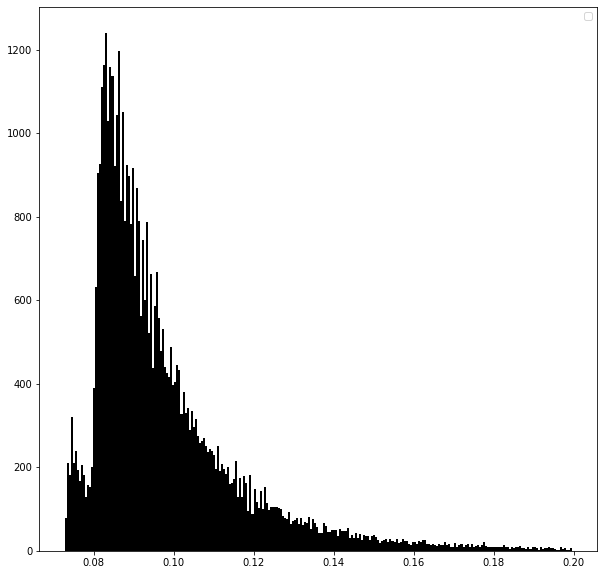

In [ ]:
Bins = 250
fig, axs = plt.subplots(figsize = [10,10])
axs.hist(clean_DL_ext_1 + clean_DL_ext_2 + clean_DL_ext_4, bins = Bins, color = 'k')
# axs.hist(clean_DL_ext_2, bins = Bins, color = 'r', label= 'Extensions 2')
# axs.hist(clean_DL_ext_1, bins = Bins, color = 'b', label= 'Extensions 1')
# axs.hist(clean_DL_ext_4, bins = Bins, color = 'g', label= 'Extensions 4')
axs.legend()

In [ ]:
clean_charge_ext_1 = []
for charge in dict_muons_ext1_to_4['extension_1']['charge']:
    if 5000000 < charge < 0.1 * 10**9:
        clean_charge_ext_1.append(charge)
        
clean_charge_ext_2 = []
for charge in dict_muons_ext1_to_4['extension_2']['charge']:
    if 8500000 < charge < 0.1 * 10**9:
        clean_charge_ext_2.append(charge)

clean_charge_ext_4 = []
for charge in dict_muons_ext1_to_4['extension_4']['charge']:
    if 3700000 < charge < 0.1 * 10**9:
        clean_charge_ext_4.append(charge)

In [ ]:
# clean_deltaEL_ext_2 = []
# for deltaEL in dict_muons_ext1_to_4['extension_2']['deltaEL']:
#     if deltaEL < 4 * 10**6:
#         clean_deltaEL_ext_2.append(deltaEL)

clean_charge_ext_1 = []
for charge in dict_muons_ext1_to_4['extension_1']['charge']:
    if 5000000 < charge < 0.1 * 10**9:
        clean_charge_ext_1.append(charge)
        
clean_charge_ext_2 = []
for charge in dict_muons_ext1_to_4['extension_2']['charge']:
    if 8500000 < charge < 0.1 * 10**9:
        clean_charge_ext_2.append(charge)

clean_charge_ext_4 = []
for charge in dict_muons_ext1_to_4['extension_4']['charge']:
    if 3700000 < charge < 0.1 * 10**9:
        clean_charge_ext_4.append(charge)

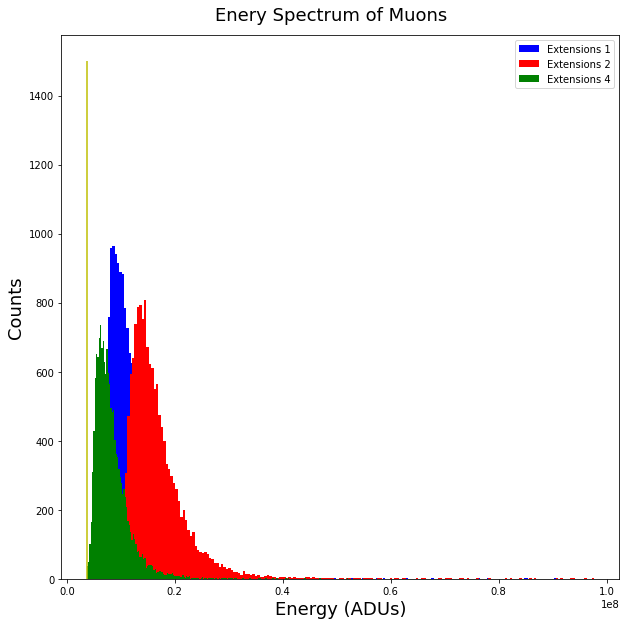

In [ ]:
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(dict_muons_ext1_to_4['extension_1']['charge'], bins = 200, color = 'b', label= 'Extensions 1')
bin_heights, bin_borders, _ = axs.hist(clean_charge_ext_1, bins = 200, color = 'b', label= 'Extensions 1')
axs.hist(clean_charge_ext_2, bins = 200, color = 'r', label= 'Extensions 2')
# axs.hist(dict_muons_ext1_to_4['extension_4']['charge'], bins = 200, color = 'g', label= 'Extensions 4')
axs.hist(clean_charge_ext_4, bins = 200, color = 'g', label= 'Extensions 4')
axs.vlines(x = 3700000.5, ymax=1500, ymin=0, colors='y')
axs.legend()

# axs.set_xlim(0,500000)
axs.set_xlabel('Energy (ADUs)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Enery Spectrum of Muons', size = 18, y=0.92)
plt.show()

In [ ]:
mean_ext1 = np.mean(clean_charge_ext_1)
mean_ext2 = np.mean(clean_charge_ext_2)
mean_ext4 = np.mean(clean_charge_ext_4)

# print('MPV: ',bin_borders[np.argmax(bin_heights)], 'ADUs')

print('Media of extension 1: ',mean_ext1, 'ADUs')
print('Media of extension 2: ',mean_ext2, 'ADUs')
print('Media of extension 4: ',mean_ext4, 'ADUs \n' )


ratio = bin_borders[np.argmax(bin_heights)] / np.mean(clean_charge_ext_4)
# print(ratio)

expected_mean_value = 282.8 # KeV

print('Como el valor promedio debería estar en ', expected_mean_value, ' KeV')

calibración_ext1= np.mean(clean_charge_ext_1)/expected_mean_value ## ADUs/Kev
calibración_ext2= np.mean(clean_charge_ext_2)/expected_mean_value ## ADUs/Kev
calibración_ext4= np.mean(clean_charge_ext_4)/expected_mean_value ## ADUs/Kev

print('La calibración será ', [calibración_ext1/1000, calibración_ext2/1000, calibración_ext4/1000], 'ADUs/eV')
print('Tomando de 1e- = 3.7 eV')


cal_ADUs_elec_ext1 = (calibración_ext1/1000) * (3.7)
cal_ADUs_elec_ext2 = (calibración_ext2/1000) * (3.7)
cal_ADUs_elec_ext4 = (calibración_ext4/1000) * (3.7)
print('La relación entre electrones y ADUs será', [cal_ADUs_elec_ext1, cal_ADUs_elec_ext2, cal_ADUs_elec_ext4], 'ADUs/e-')


Media of extension 1:  11642596.0 ADUs
Media of extension 2:  16675426.0 ADUs
Media of extension 4:  8322397.0 ADUs 

Como el valor promedio debería estar en  282.8  KeV
La calibración será  [41.1690099009901, 58.96543847241867, 29.42856082036775] ADUs/eV
Tomando de 1e- = 3.7 eV
La relación entre electrones y ADUs será [152.32533663366337, 218.17212234794908, 108.88567503536068] ADUs/e-


In [ ]:
clean_deltaEL_ext_2 = []
for deltaEL in dict_muons_ext1_to_4['extension_2']['deltaEL']:
    if 118000000 < deltaEL < 270000000:
        clean_deltaEL_ext_2.append(deltaEL)

clean_deltaEL_ext_1 = []
for deltaEL in dict_muons_ext1_to_4['extension_1']['deltaEL']:
    if 80000000 < deltaEL < 240000000:
        clean_deltaEL_ext_1.append(deltaEL)

clean_deltaEL_ext_4 = []
for deltaEL in dict_muons_ext1_to_4['extension_2']['deltaEL']:
    if 118000000 < deltaEL < 350000000:
        clean_deltaEL_ext_4.append(deltaEL)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


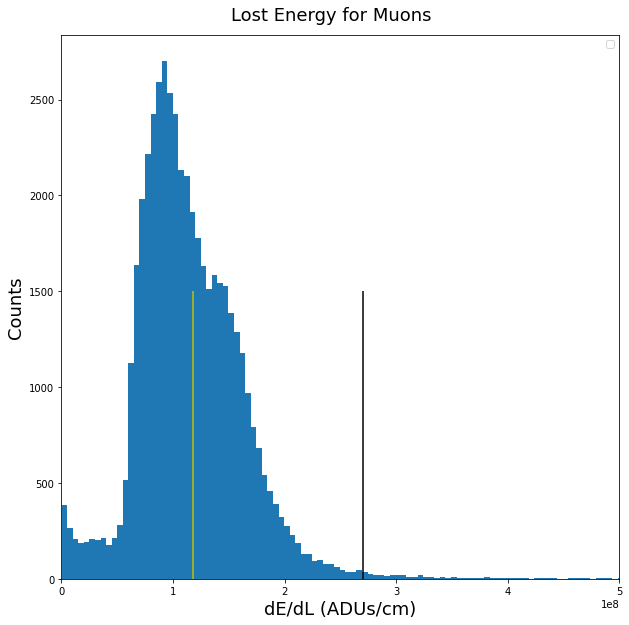

In [ ]:
fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(dict_muons_ext1_to_4['extension_1']['deltaEL'], bins = 200, color = 'b', label= 'Extensions 1')
axs.hist(dict_muons_ext1_to_4['extension_1']['deltaEL'] + dict_muons_ext1_to_4['extension_2']['deltaEL'] + dict_muons_ext1_to_4['extension_4']['deltaEL'], bins = 1000)
# axs.hist(clean_deltaEL_ext_4, bins = 200, color = 'g', label= 'Extensions 4')
# axs.hist(clean_deltaEL_ext_1, bins = 200, color = 'b', label= 'Extensions 1')
# axs.hist(clean_deltaEL_ext_2, bins = 200, color = 'r', label= 'Extensions 2')

# axs.hist(dict_muons_ext1_to_4['extension_4']['deltaEL'], bins = 200, color = 'g', label= 'Extensions 4')
# axs.hist(dict_muons_ext1_to_4['extension_1']['deltaEL'], bins = 200, color = 'g', label= 'Extensions 4')
# axs.hist(dict_muons_ext1_to_4['extension_2']['deltaEL'], bins = 200, color = 'g', label= 'Extensions 4')
axs.vlines(x = 118000000, ymax=1500, ymin=0, colors='y')
axs.vlines(x = 270000000, ymax=1500, ymin=0, colors='k')
axs.legend()

axs.set_xlim(0,500000000)
axs.set_xlabel('dE/dL (ADUs/cm)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Lost Energy for Muons', size = 18, y=0.92)
plt.show()

In [ ]:
deltaEL_KeV = 3.9 * 1000 #KeV/cm
print('Mean value of dE/dL of extension 1: ', np.mean(dict_muons_ext1_to_4['extension_1']['deltaEL']), 'ADUs/cm')
# print('Mean value of dE/dL of extension 2: ', np.mean(dict_muons_ext1_to_4['extension_2']['deltaEL']), 'ADUs/cm')
print('Mean value of dE/dL of extension 2: ', np.mean(clean_deltaEL_ext_2), 'ADUs/cm')
print('Mean value of dE/dL of extension 4: ', np.mean(dict_muons_ext1_to_4['extension_4']['deltaEL']), 'ADUs/cm')

print('The value of dE/dL for muons with 10³ MeV is: ', deltaEL_KeV, 'KeV/cm \n')

ADUs_to_KeV_ext1 = deltaEL_KeV / np.mean(dict_muons_ext1_to_4['extension_1']['deltaEL']) 
# ADUs_to_KeV_ext2 = deltaEL_KeV / np.mean(dict_muons_ext1_to_4['extension_2']['deltaEL']) 
ADUs_to_KeV_ext2 = deltaEL_KeV / np.mean(clean_deltaEL_ext_2) 
ADUs_to_KeV_ext4 = deltaEL_KeV / np.mean(dict_muons_ext1_to_4['extension_4']['deltaEL'])


print('For extensions 1,2 and 4, ', [ADUs_to_KeV_ext1, ADUs_to_KeV_ext2, ADUs_to_KeV_ext4], 'KeV/ADUs')
print('Or ', [ADUs_to_KeV_ext1**(-1), ADUs_to_KeV_ext2**(-1), ADUs_to_KeV_ext4**(-1)], 'ADUs/KeV \n')

ratio_eV_per_e = 3.7 #eV/e-
ratio_keV_per_e = ratio_eV_per_e / 1000 #KeV/e-
print('We suppose to ' + str(ratio_eV_per_e) + ' eV/e = ' + str(ratio_keV_per_e) + ' KeV/e')

ADUs_per_electron_ext1 = ADUs_to_KeV_ext1 / ratio_keV_per_e 
ADUs_per_electron_ext2 = ADUs_to_KeV_ext2 / ratio_keV_per_e
ADUs_per_electron_ext4 = ADUs_to_KeV_ext4 / ratio_keV_per_e

print('Then, for extensions 1,2 and 4 we have ', [ADUs_per_electron_ext1, ADUs_per_electron_ext2, ADUs_per_electron_ext4], 'ADUs/e-')
print('Or ', [ADUs_per_electron_ext1**(-1), ADUs_per_electron_ext2**(-1), ADUs_per_electron_ext4**(-1)], 'e-/ADUs')


Mean value of dE/dL of extension 1:  109465310.92908297 ADUs/cm
Mean value of dE/dL of extension 2:  163273326.9777792 ADUs/cm
Mean value of dE/dL of extension 4:  78359449.05822417 ADUs/cm
The value of dE/dL for muons with 10³ MeV is:  3900.0 KeV/cm 

For extensions 1,2 and 4,  [3.5627725047313044e-05, 2.388632651878756e-05, 4.977064089746401e-05] KeV/ADUs
Or  [28068.02844335461, 41864.955635328, 20092.166425185686] ADUs/KeV 

We suppose to 3.7 eV/e = 0.0037 KeV/e
Then, for extensions 1,2 and 4 we have  [0.009629114877652174, 0.006455763923996638, 0.013451524566882166] ADUs/e-
Or  [103.85170524041206, 154.90033585071362, 74.34101577318704] e-/ADUs


In [ ]:
muon_spectrum = []
muon_spectrum_ext2 = []
muon_spectrum_ext1 = []
muon_spectrum_ext4 = []

ADUs = 1000000
# for charge in charge_all_extension:
#     if charge < ADUs:
#         muon_spectrum.append(charge )

for charge in dict_muons_ext1_to_4['extension_1']['charge']:
    # if charge < ADUs:
        # muon_spectrum_ext1.append(charge)
    muon_spectrum_ext1.append(charge * ADUs_to_KeV_ext1)

# for charge in dict_muons_ext1_to_4['extension_2']['charge']:
#     if charge * ADUs_to_KeV_ext2 < 20000:
#         # muon_spectrum_ext2.append(charge)
#         muon_spectrum_ext2.append(charge * ADUs_to_KeV_ext2)
for charge in clean_charge_ext_2:
    # if charge * ADUs_to_KeV_ext2 < 20000:
        # muon_spectrum_ext2.append(charge)
    muon_spectrum_ext2.append(charge * ADUs_to_KeV_ext2)

for charge in dict_muons_ext1_to_4['extension_4']['charge']:
    # if charge < ADUs:
        # muon_spectrum_ext4.append(charge )
    muon_spectrum_ext4.append(charge * ADUs_to_KeV_ext4)

muon_spectrum = muon_spectrum_ext1 + muon_spectrum_ext2 + muon_spectrum_ext4


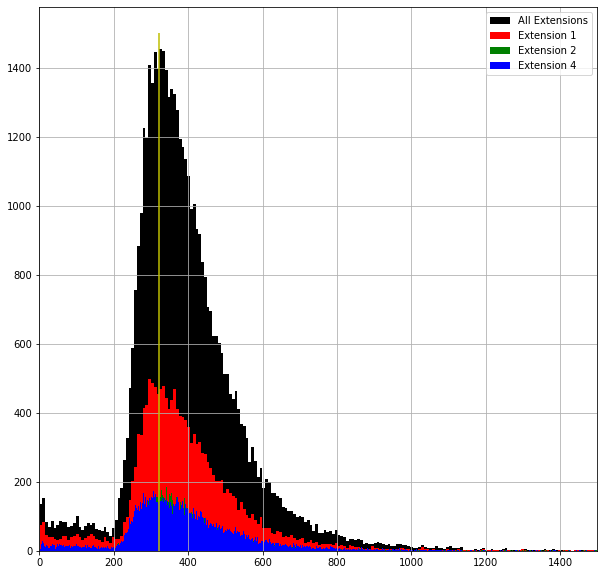

In [ ]:
Bins = 1000
fig, axs = plt.subplots(figsize = [10,10])
bin_heights, bin_borders, _ = axs.hist(muon_spectrum, bins = Bins, color = 'k', label = 'All Extensions')
axs.hist(muon_spectrum_ext1, color = 'r', label = 'Extension 1', bins = Bins)
axs.hist(muon_spectrum_ext2, color = 'g', label = 'Extension 2',  bins = Bins)
axs.hist(muon_spectrum_ext4, color = 'b', label = 'Extension 4',  bins = Bins)
axs.vlines(x = 322.23, ymax=1500, ymin=0, colors='y')

# axs.hist(dict_muons_ext1_to_4['charge_All_extension'], bins = 500,  color = 'k')
# axs.hist(dict_muons_ext1_to_4['charge_ext1'], bins = 500,  color = 'r')
# axs.hist(dict_muons_ext1_to_4['charge_ext2'], bins = 500,  color = 'g')

# axs.set_xscale('log')
axs.set_xlim(0,1500)
axs.legend()
axs.grid()

plt.show()

In [ ]:
bin_borders[np.argmax(bin_heights)]

322.233640943105

In [ ]:
# muon_DeltaEL = []
muon_DeltaEL_ext2 = []
muon_DeltaEL_ext1 = []
muon_DeltaEL_ext4 = []

ADUs = 1000000
# for charge in charge_all_extension:
#     if charge < ADUs:
#         muon_spectrum.append(charge )

for deltaEL in dict_muons_ext1_to_4['extension_1']['deltaEL']:
    # if charge < ADUs:
        # muon_spectrum_ext1.append(charge)
    muon_DeltaEL_ext1.append(deltaEL * ADUs_to_KeV_ext1 / 1000) #Mev/cm

# for charge in dict_muons_ext1_to_4['extension_2']['charge']:
#     if charge * ADUs_to_KeV_ext2 < 20000:
#         # muon_spectrum_ext2.append(charge)
#         muon_spectrum_ext2.append(charge * ADUs_to_KeV_ext2)
for deltaEL in clean_deltaEL_ext_2:
    # if charge * ADUs_to_KeV_ext2 < 20000:
        # muon_spectrum_ext2.append(charge)
    muon_DeltaEL_ext2.append(deltaEL * ADUs_to_KeV_ext2 / 1000)

for deltaEL in dict_muons_ext1_to_4['extension_4']['deltaEL']:
    # if charge < ADUs:
        # muon_spectrum_ext4.append(charge )
    muon_DeltaEL_ext4.append(deltaEL * ADUs_to_KeV_ext4 / 1000)

muon_DeltaEL = muon_DeltaEL_ext1 + muon_DeltaEL_ext2 + muon_DeltaEL_ext4

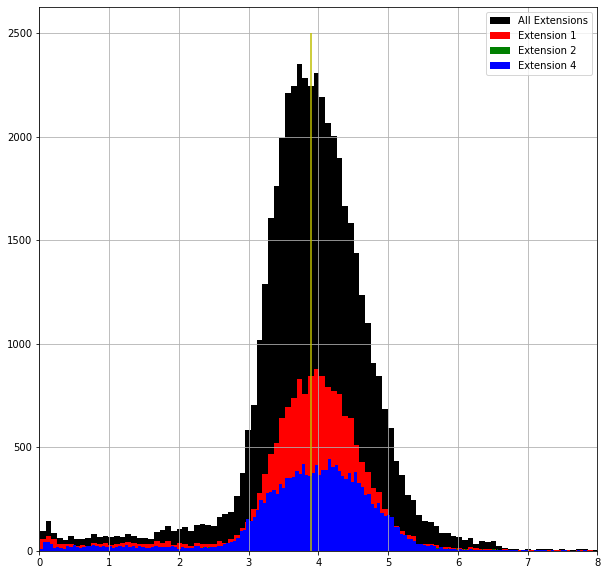

In [ ]:
Bins = 300
fig, axs = plt.subplots(figsize = [10,10])
bin_heights, bin_borders, _ = axs.hist(muon_DeltaEL, bins = Bins, color = 'k', label = 'All Extensions')
axs.hist(muon_DeltaEL_ext1, color = 'r', label = 'Extension 1', bins = Bins)
axs.hist(muon_DeltaEL_ext2, color = 'g', label = 'Extension 2',  bins = Bins)
axs.hist(muon_DeltaEL_ext4, color = 'b', label = 'Extension 4',  bins = Bins)
axs.vlines(x = 3.9, ymax=2500, ymin=0, colors='y')

# axs.hist(dict_muons_ext1_to_4['charge_All_extension'], bins = 500,  color = 'k')
# axs.hist(dict_muons_ext1_to_4['charge_ext1'], bins = 500,  color = 'r')
# axs.hist(dict_muons_ext1_to_4['charge_ext2'], bins = 500,  color = 'g')

# axs.set_xscale('log')
axs.set_xlim(0,8)
axs.legend()
axs.grid()

plt.show()

In [ ]:
bin_borders[np.argmax(bin_heights)]

NameError: name 'bin_borders' is not defined

## Espectro Am-241

In [ ]:
path_am = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/dict_Am241_Imgs_676.pkl'
data_am_241 = open(path_am, 'rb')
dict_am_241 = pck.load(data_am_241)
data_am_241.close()

In [ ]:
print('General keys :', dict_am_241.keys())
print('Specific keys :', dict_am_241['extension_1'].keys())

General keys : dict_keys(['All_Gammas_Detected', 'extension_1', 'extension_2', 'extension_4'])
Specific keys : dict_keys(['charge'])


In [ ]:
# dict_am_241['extension_1']

In [ ]:
gamma_spectrum = []
gamma_spectrum_ext1 = []
gamma_spectrum_ext2 = []
gamma_spectrum_ext4 = []

for charge in dict_am_241['extension_1']['charge']:
    if charge < 10000:
        gamma_spectrum_ext1.append(charge)

for charge in dict_am_241['extension_2']['charge']:
    if charge < 15000:
    # if 20000 < charge < 80000:
    # if charge < 60000 : 
        gamma_spectrum_ext2.append(charge)

for charge in dict_am_241['extension_4']['charge']:
    if charge < 10000:
        gamma_spectrum_ext4.append(charge)

gamma_spectrum = gamma_spectrum_ext4 + gamma_spectrum_ext2 + gamma_spectrum_ext1

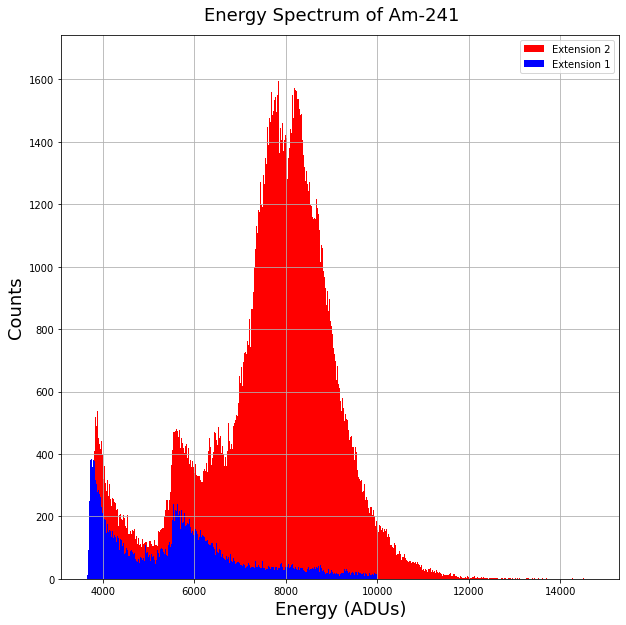

In [ ]:
Bins = 1500 
fig, axs = plt.subplots(figsize = [10,10])

# axs.hist(dict_am_241['extension_2']['charge'], bins = 1000, color = 'r', label = 'Extension 2')

# axs.hist(gamma_spectrum, bins = Bins, color = 'k')#, label = ' All Extensions')
axs.hist(gamma_spectrum_ext2, bins = Bins, color = 'r', label = 'Extension 2')
# axs.hist(gamma_spectrum_ext4, bins = Bins, color = 'g', label = 'Extension 4')
axs.hist(gamma_spectrum_ext1, bins = Bins, color = 'b', label = 'Extension 1')

fig.suptitle('Energy Spectrum of Am-241', size = 18, y=0.92)
# axs.set_xlim(0,15000)
axs.set_xlabel('Energy (ADUs)', size = 18)
axs.set_ylabel('Counts', size = 18)
# axs.set_yscale('log')
axs.legend()
axs.grid()
plt.show()

In [ ]:
path_am = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/dict_Am241_Imgs_676.pkl'
data_am_241 = open(path_am, 'rb')
dict_am_241 = pck.load(data_am_241)
data_am_241.close()

In [ ]:
gamma_spectrum = []
gamma_spectrum_ext2 = []
gamma_spectrum_ext1_4 = []

# for charge in dict_am_241['charge_All_extension']:
#     if 2000 < charge < 14000:
#         gamma_spectrum.append(charge)

for charge in dict_am_241['charge_ext2']:
    if 2000 < charge < 10000:
        gamma_spectrum_ext2.append(charge)

# for charge in dict_am_241['charge_ext1_4']:
#     if 2000 < charge < 14000:
#         gamma_spectrum_ext1_4.append(charge)

KeyError: 'charge_ext2'

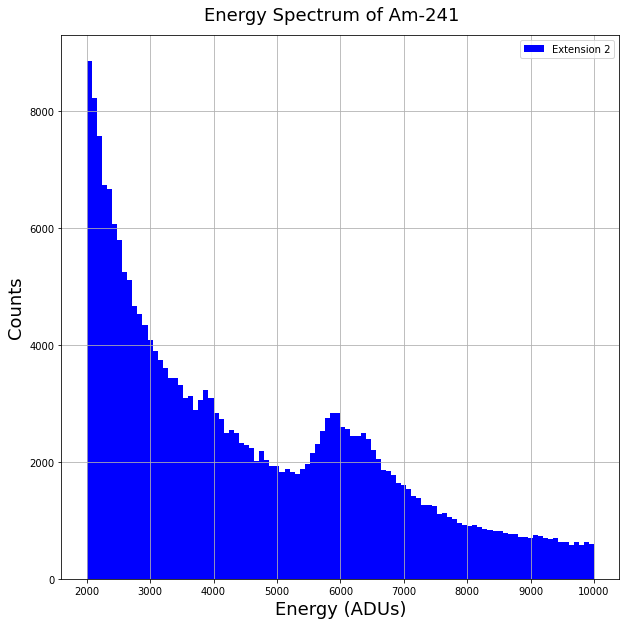

In [ ]:
Bins =  100 

fig, axs = plt.subplots(figsize = [10,10])
# axs.hist(gamma_spectrum, bins = 30000, color = 'k', label = 'All Extensions')
# axs.hist(gamma_spectrum_ext1_4, bins = 40000, color = 'r', label = 'Extensions 1 and 4')
axs.hist(gamma_spectrum_ext2, bins = Bins, color = 'b', label = 'Extension 2')

fig.suptitle('Energy Spectrum of Am-241', size = 18, y=0.92)
# axs.set_xlim(2000,14000)
axs.set_xlabel('Energy (ADUs)', size = 18)
axs.set_ylabel('Counts', size = 18)
axs.legend()
axs.grid()
plt.show()

## Espectro Imágenes NSAMP 324


In [ ]:
# path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/dict_muons_Extensions_1_to_4_Imgs_283_Sol_0.7_Elip_4.5_ADUs__.pkl'
# path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/dict_muons_Extensions_1_to_4_Imgs_314_Sol_0.7_Elip_4.7_MeVs__feb_02.pkl'
path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/dict_muons_Extensions_1_to_4_Imgs_341_Sol_0.7_Elip_5_MeVs__09_Feb.pkl'
# path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/dict_muons_Extensions_1_to_4_Imgs_62_Sol_0.7_Elip_5.5_MeVs__.pkl'
histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

In [ ]:
print('Llaves principales: ', data_histogram.keys())
print('Llaves secundarias: ', data_histogram['extension_1'].keys())
print('Muones detectados: ', data_histogram['All_Muons_Detected'])

Llaves principales:  dict_keys(['All_Muons_Detected', 'extension_1', 'extension_2', 'extension_4'])
Llaves secundarias:  dict_keys(['charge', 'deltaEL', 'deltaL'])
Muones detectados:  5435


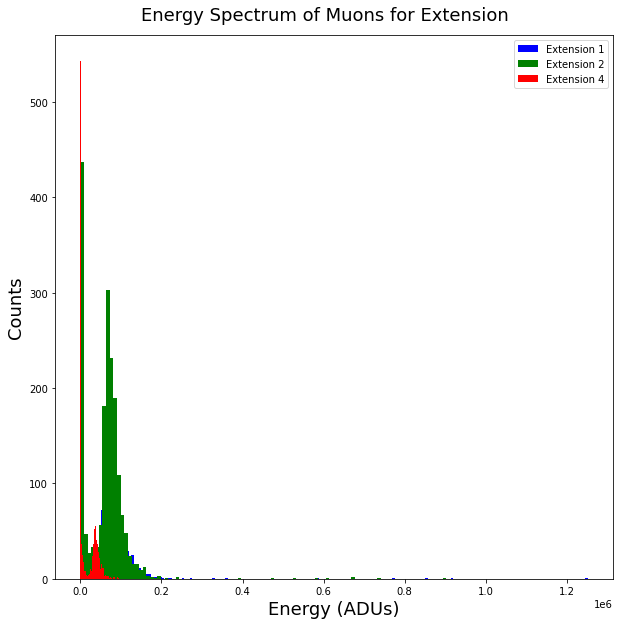

In [ ]:
fig, axs = plt.subplots(figsize = [10,10])
axs.hist(data_histogram['extension_1']['charge'], bins = 200, color = 'b', label = 'Extension 1')
axs.hist(data_histogram['extension_2']['charge'], bins = 100, color = 'g', label = 'Extension 2')
axs.hist(data_histogram['extension_4']['charge'], bins = 100, color = 'r', label = 'Extension 4')
axs.legend()

# axs.set_xlim(0, 0.5 * 10**8)
# axs.set_xlim(0, 0.2 * 10**6)
axs.set_xlabel('Energy (ADUs)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Energy Spectrum of Muons for Extension', size = 18, y=0.92)
plt.show()

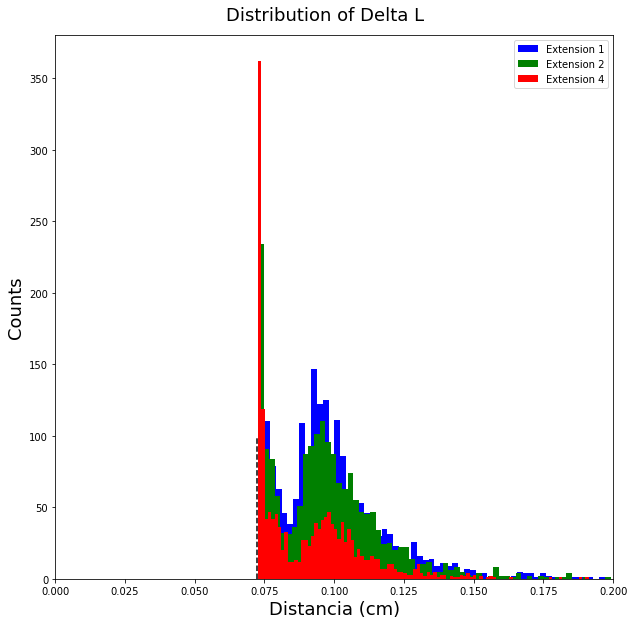

In [ ]:
fig, axs = plt.subplots(figsize = [10,10])
axs.hist(data_histogram['extension_1']['deltaL'], bins = 100, color = 'b', label = 'Extension 1')
axs.hist(data_histogram['extension_2']['deltaL'], bins = 100, color = 'g', label = 'Extension 2')
axs.hist(data_histogram['extension_4']['deltaL'], bins = 100, color = 'r', label = 'Extension 4')

# axs.hist(data_histogram['extension_4']['deltaL'] + data_histogram['extension_2']['deltaL'] + data_histogram['extension_1']['deltaL'] ,
            #  bins = 100, color = 'k', label = 'All Extensions')
axs.vlines([0.0725], 0, 100, colors='k', linestyles='dashed')
axs.legend()

axs.set_xlim(0, 0.2)
axs.set_xlabel('Distancia (cm)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Distribution of Delta L', size = 18, y=0.92)
plt.show()

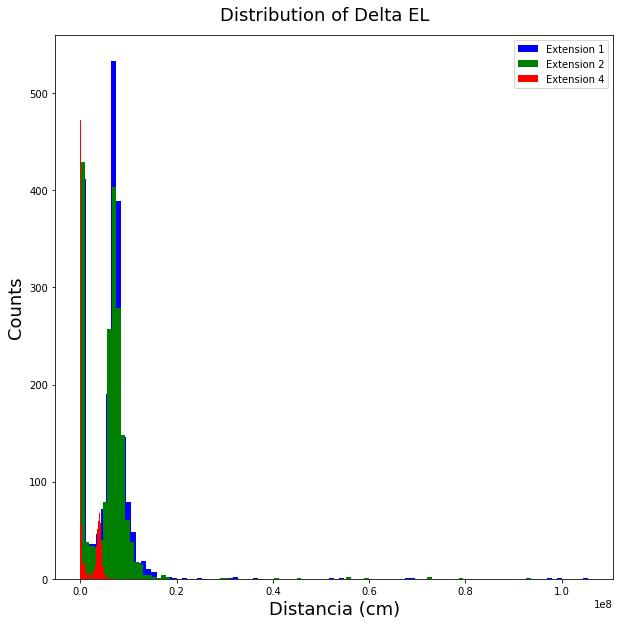

In [ ]:
fig, axs = plt.subplots(figsize = [10,10])
axs.hist(data_histogram['extension_1']['deltaEL'], bins = 100, color = 'b', label = 'Extension 1')
axs.hist(data_histogram['extension_2']['deltaEL'], bins = 100, color = 'g', label = 'Extension 2')
axs.hist(data_histogram['extension_4']['deltaEL'], bins = 100, color = 'r', label = 'Extension 4')
axs.legend()

# axs.set_xlim(0, 0.5 * 10**9)
axs.set_xlabel('Distancia (cm)', size = 18)
axs.set_ylabel('Counts', size = 18)
fig.suptitle('Distribution of Delta EL', size = 18, y=0.92)
plt.show()

In [ ]:
clean_charge_ext_1 = []
for charge in data_histogram['extension_1']['charge']:
    if 5000000 < charge < 0.1 * 10**9:
        clean_charge_ext_1.append(charge)